# Summary:
In this preliminary segmentatin analysis, we cluster users by \[most of] the ***qx*** columns. Including :
['qxactivitiesxdrivers' 'qxactivitiesximportance'
 'qxactivitiesxqualityxindicators' 'qxactivitiesxrecency'
 'qxactivitiesxsatisfaction' 'qxadvocacy01' 'qxadvocacy02' 'qxbrandxlove'
 'qxbrandxtrustxdrivers' 'qxdrivers' 'qxenrichment' 'qxexpectations'
 'qxoverallxqualityxindicators' 'qxretention' 'qxtime' 'qxtransition'
 'qxunlocking']
 
We've standardized the data and replaced missing values with 0 (i.e. the mean in the unstardadized data). Optimal number of clusters determined to be 3 using Elbow Method. The there clusters are differentiated by the distribution of  varibles pertaining to importance and quality of various activities. Cluster two, specifically has lower ratings across the board for the importance and quality of various activities. This cluster is also heavily dominated by *iPhone users*. The drivers of membership to this cluster are: 


qxactivitiesxqualityxindicators_2_10	
Is enjoyable - Setting up and managing notifications - How much do you agree or disagree with the following about different activities you do with [MODEL]? Again, please think of your experience with the preinstalled manufa

qxactivitiesxqualityxindicators_1_23
Reinforces my trust in [BRAND] - Making a mobile payment with your smartphone at a store terminal - How much do you agree or disagree with the following about different activities you do with [MODEL]? Again, please think of

qxactivitiesxdrivers_25_24	
Asking digital assistant a question - My [MODEL] introduces me to new experiences and adventures - How much do you agree or disagree with the following statements for the activities below? For each of these activities, please think of

qxactivitiesxsatisfaction_21	
Tracking your wellbeing (steps, exercise, sleep, etc.) - How satisfied are you with your [MODEL]’s performance on each of the activities below?
 

# Residial Q's / FUP's :
- What are the hidactivitiesqualified_ variables?
- qxactivitiesxqualityxindicators_ got excluded with \_get_numeric_data

In [322]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline  

# Seaborn visualization library
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans


from sklearn.linear_model import LogisticRegression

In [392]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

pd.set_option('display.max_colwidth', 1000)

# Load in Data

In [219]:
root = r"07 Samsung UX Index - Web App Implementation/"

fname_data = root + r"Samsung UX Index Survey_Data.csv"
df_data = pd.read_csv(fname_data)

fname_vaxmap = root + r"Samsung UX Index Survey_Datamap.xlsx"
df_varmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=0)
df_valmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=1)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# List Data Columns

In [220]:
print([x for x in df_data.columns])

['respid', 'WEIGHT', 'd2', 'hidagemodels', 'qxcurrentxmodel', 'hbrand', 'hmodelquota', 'qxtime', 'qxoverallxqualityxindicators_1', 'qxoverallxqualityxindicators_2', 'qxoverallxqualityxindicators_3', 'qxoverallxqualityxindicators_4', 'qxactivitiesximportance_1', 'qxactivitiesximportance_2', 'qxactivitiesximportance_3', 'qxactivitiesximportance_4', 'qxactivitiesximportance_5', 'qxactivitiesximportance_6', 'qxactivitiesximportance_7', 'qxactivitiesximportance_8', 'qxactivitiesximportance_9', 'qxactivitiesximportance_10', 'qxactivitiesximportance_11', 'qxactivitiesximportance_12', 'qxactivitiesximportance_13', 'qxactivitiesximportance_14', 'qxactivitiesximportance_15', 'qxactivitiesximportance_16', 'qxactivitiesximportance_17', 'qxactivitiesximportance_18', 'qxactivitiesximportance_19', 'qxactivitiesximportance_20', 'qxactivitiesximportance_21', 'qxactivitiesximportance_22', 'qxactivitiesximportance_23', 'qxactivitiesximportance_24', 'qxactivitiesximportance_25', 'qxactivitiesxrecency_1', 

In [221]:
print( np.unique(np.array(([x.split('_')[0] for x in df_data.columns]))))

['AR' 'Empowered' 'UX' 'UXindex' 'WEIGHT' 'alarm' 'att01' 'att02'
 'calendar' 'charging' 'customizing' 'd1' 'd2' 'd3' 'd4' 'd5x1' 'd5x2'
 'd6' 'd7' 'digital' 'display' 'front' 'hbrand' 'hidactivitiesqualified'
 'hidagemodels' 'hmodelquota' 'location' 'mobile' 'multiple'
 'notifications' 'organizing' 'photo' 'quick' 'qxactivitiesxdrivers'
 'qxactivitiesximportance' 'qxactivitiesxqualityxindicators'
 'qxactivitiesxrecency' 'qxactivitiesxsatisfaction' 'qxadvocacy01'
 'qxadvocacy02' 'qxbrandxlove' 'qxbrandxtrustxdrivers' 'qxcurrentxcarrier'
 'qxcurrentxmodel' 'qxcurrentxos' 'qxcurrentxosx02' 'qxcurrentxstorage'
 'qxdrivers' 'qxdriversxoe' 'qxenrichment' 'qxexpectations'
 'qxotherxdevices' 'qxoverallxqualityxindicators' 'qxpreviousxbrand'
 'qxpreviousxmodel' 'qxretention' 'qxtime' 'qxtransition' 'qxunlocking'
 'qxupgrade01' 'rear' 'respid' 'ret06' 'search' 'sending' 'sharing'
 'soc03' 'soc04' 'speaker' 'tracking' 'transferring' 'unlocking' 'using'
 'video']


In [222]:
df_varmap.head().style.set_properties(subset=['Label'], **{'width': '300px'})

In [223]:

df_varmap[df_varmap.Variable.str.contains("qxactivitiesxrecency_16")].style.set_properties(subset=['Label'], 
                                                                                   **{'width': '300px'})

# Segmentation based on  all [qx] columns

In [289]:
# select columns that start with qx
qx_list = [ x for x in df_data.columns if 'qx' in x ]
print(len(qx_list))

# drop qxcurrentxmodel (Which smartphone model do you currently use...)
qx_list = [ x for x in qx_list if 'qxcurrentxmodel' not in x ]
print(len(qx_list))

# drop qxotherxdevices (Q_Other_Devices. XXX - XX - What brands of the following devices do you own?)
qx_list = [ x for x in qx_list if 'qxotherxdevices' not in x ]
print(len(qx_list))

# drop qxcurrentxcarrier (Q_Current_Carrier. Which mobile carrier do you use on your...?)
qx_list = [ x for x in qx_list if 'qxcurrentxcarrier' not in x ]
print(len(qx_list))

# drop qxcurrentxos (Q_Current_OS. Which version of XXX are you currently using on your smartphone?)
qx_list = [ x for x in qx_list if 'qxcurrentxos' not in x ]
print(len(qx_list))

# drop qxcurrentxstorage
qx_list = [ x for x in qx_list if 'qxcurrentxstorage' not in x ]
print(len(qx_list))

# drop qxpreviousxbrand
qx_list = [ x for x in qx_list if 'qxpreviousxbrand' not in x ]
print(len(qx_list))

# drop qxpreviousxmodel
qx_list = [ x for x in qx_list if 'qxpreviousxmodel' not in x ]
print(len(qx_list))

# drop qxupgrade
qx_list = [ x for x in qx_list if 'qxupgrade' not in x ]
print(len(qx_list))

# drop qxdriversxoe (QxDriversxOE. What else, besides those things 
# that you have just rated, is important for you in a smartphone? 
# Please think about it at a higher level, in terms of what a 
# smartphone can do for you, how it may make you feel, and how you 
# would like the proce)
qx_list = [ x for x in qx_list if 'xoe' not in x ]
print(len(qx_list))

df_data_sub = df_data[qx_list]

# list all column categories
print( np.unique(np.array(([x.split('_')[0] for x in df_data_sub.columns]))))


1170
1169
1115
1113
1110
1109
1107
1087
1077
1076
['qxactivitiesxdrivers' 'qxactivitiesximportance'
 'qxactivitiesxqualityxindicators' 'qxactivitiesxrecency'
 'qxactivitiesxsatisfaction' 'qxadvocacy01' 'qxadvocacy02' 'qxbrandxlove'
 'qxbrandxtrustxdrivers' 'qxdrivers' 'qxenrichment' 'qxexpectations'
 'qxoverallxqualityxindicators' 'qxretention' 'qxtime' 'qxtransition'
 'qxunlocking']


In [290]:
# list non  integer columns  to be coerced into ints
coerce_cols = df_data_sub.dtypes[df_data_sub.dtypes!='int64'].index.to_list()
df_data_sub[coerce_cols] = df_data_sub[coerce_cols].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [291]:
# list all column types
print( np.unique(np.array(([x.split('_')[0] for x in df_data_sub.columns]))))

# confirm all are numeric types
print(np.unique(df_data_sub.dtypes.to_frame()[0].to_list()))

df_data_sub.describe()

['qxactivitiesxdrivers' 'qxactivitiesximportance'
 'qxactivitiesxqualityxindicators' 'qxactivitiesxrecency'
 'qxactivitiesxsatisfaction' 'qxadvocacy01' 'qxadvocacy02' 'qxbrandxlove'
 'qxbrandxtrustxdrivers' 'qxdrivers' 'qxenrichment' 'qxexpectations'
 'qxoverallxqualityxindicators' 'qxretention' 'qxtime' 'qxtransition'
 'qxunlocking']
[dtype('int64') dtype('float64')]


qxtime  qxoverallxqualityxindicators_1  qxoverallxqualityxindicators_2  qxoverallxqualityxindicators_3  qxoverallxqualityxindicators_4  qxactivitiesximportance_1  qxactivitiesximportance_2  qxactivitiesximportance_3  qxactivitiesximportance_4  qxactivitiesximportance_5  qxactivitiesximportance_6  qxactivitiesximportance_7  qxactivitiesximportance_8  qxactivitiesximportance_9  qxactivitiesximportance_10  qxactivitiesximportance_11  qxactivitiesximportance_12  qxactivitiesximportance_13  qxactivitiesximportance_14  qxactivitiesximportance_15  qxactivitiesximportance_16  qxactivitiesximportance_17  qxactivitiesximportance_18  qxactivitiesximportance_19  qxactivitiesximportance_20  qxactivitiesximportance_21  qxactivitiesximportance_22  qxactivitiesximportance_23  qxactivitiesximportance_24  qxactivitiesximportance_25  qxactivitiesxrecency_1  qxactivitiesxrecency_2  qxactivitiesxrecency_3  qxactivitiesxrecency_4  qxactivitiesxrecency_5  qxactivitiesxrecency_6  \
count  3254.000000                     3254.000000                     3254.000000                     3254.000000                     3254.000000                3254.000000                3254.000000                3254.000000                3254.000000                3254.000000                3254.000000                3254.000000                3254.000000                3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000                 3254.000000             3254.000000             3254.000000             3254.000000             3254.000000             3254.000000             3254.000000   
mean      4.086355                        5.744007                        5.775661                        5.905040                        6.094960                   5.522434                   6.251998                   5.031346                   5.748617                   5.801475                   4.183467                   5.314075                   5.512907                   5.387523                    5.436693                    5.363553                    5.308851                    5.799017                    6.261832                    5.909342                    5.554702                    5.593731                    5.183159                    5.576214                    5.933006                    4.255685                    4.815304                    4.535034                    4.179779                    3.527966                1.668101                1.344499                3.934849                1.660725                1.648740                3.484634   
std       1.428137                        1.269394                        1.220311                        1.207067                        1.095453                   1.471928                   1.106302                   1.674275                   1.442447                   1.330407                   1.909372                   1.447834                   1.381997                   1.435608                    1.417520                    1.508753                    1.591227                    1.383953                    1.114270                    1.337838                    1.541092                    1.412790                    1.571616                    1.407087                    1.303522                    1.874749                    1.711608                    1.952676                    1.975397                    2.000227                1.220728                1.062570                2.099301                1.637014                1.264997                2.462178   
min       1.000000                        1.000000                      

In [292]:
# Count Na values
df_data_sub.isna().sum()[df_data_sub.isna().sum()>0]

qxactivitiesxqualityxindicators_1_1     470
qxactivitiesxqualityxindicators_2_1     470
qxactivitiesxqualityxindicators_3_1     470
qxactivitiesxqualityxindicators_4_1     470
qxactivitiesxqualityxindicators_1_2     243
                                       ... 
qxactivitiesxdrivers_31_25             3254
qxactivitiesxdrivers_32_25             3254
qxactivitiesxdrivers_33_25             3254
qxactivitiesxdrivers_34_25             3254
qxtransition_1                          121
Length: 976, dtype: int64

In [293]:
# Standardize the qx_list columns
scaler = StandardScaler().fit(df_data_sub)
df_data_sub_std = df_data_sub.copy()
df_data_sub_std[df_data_sub.columns] = scaler.transform(df_data_sub)
df_data_sub_std.describe()

/usr/local/lib/python3.7/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


qxtime  qxoverallxqualityxindicators_1  qxoverallxqualityxindicators_2  qxoverallxqualityxindicators_3  qxoverallxqualityxindicators_4  qxactivitiesximportance_1  qxactivitiesximportance_2  qxactivitiesximportance_3  qxactivitiesximportance_4  qxactivitiesximportance_5  qxactivitiesximportance_6  qxactivitiesximportance_7  qxactivitiesximportance_8  qxactivitiesximportance_9  qxactivitiesximportance_10  qxactivitiesximportance_11  qxactivitiesximportance_12  qxactivitiesximportance_13  qxactivitiesximportance_14  qxactivitiesximportance_15  qxactivitiesximportance_16  qxactivitiesximportance_17  qxactivitiesximportance_18  qxactivitiesximportance_19  qxactivitiesximportance_20  qxactivitiesximportance_21  qxactivitiesximportance_22  qxactivitiesximportance_23  qxactivitiesximportance_24  qxactivitiesximportance_25  qxactivitiesxrecency_1  qxactivitiesxrecency_2  qxactivitiesxrecency_3  qxactivitiesxrecency_4  qxactivitiesxrecency_5  qxactivitiesxrecency_6  \
count  3.254000e+03                    3.254000e+03                    3.254000e+03                    3.254000e+03                    3.254000e+03               3.254000e+03               3.254000e+03               3.254000e+03               3.254000e+03               3.254000e+03               3.254000e+03               3.254000e+03               3.254000e+03               3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03                3.254000e+03            3.254000e+03            3.254000e+03            3.254000e+03            3.254000e+03            3.254000e+03            3.254000e+03   
mean   4.367196e-17                   -1.572190e-16                    2.358286e-16                    2.183598e-16                   -2.445630e-16              -1.266487e-16               7.424233e-17              -5.349815e-17               1.048127e-16              -4.367196e-18               1.222815e-16              -1.703206e-16               1.834222e-16              -2.565727e-16               -5.568174e-17               -2.238188e-16                1.746878e-17               -4.258016e-17                1.452093e-16                5.022275e-17               -2.434712e-16                1.222815e-16               -1.746878e-16                2.871431e-16                2.511138e-16               -1.746878e-16                1.484847e-16                2.401958e-16               -1.310159e-16                5.240635e-17           -7.642592e-17            4.367196e-17            5.240635e-17           -7.860952e-17           -8.734391e-18            3.493757e-17   
std    1.000154e+00                    1.000154e+00                    1.000154e+00                    1.000154e+00                    1.000154e+00               1.000154e+00               1.000154e+00               1.000154e+00               1.000154e+00               1.000154e+00               1.000154e+00               1.000154e+00               1.000154e+00               1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00                1.000154e+00            1.000154e+00            1.000154e+00            1.000154e+00            1.000154e+00            1.000154e+00            1.000154e+00   
min   -2.161439e+00                   -3.737796e+00                  

In [294]:
# fill NA's with 0
df_data_sub_std.fillna(0, inplace=True)

In [296]:
# Count Na values
df_data_sub_std.isna().sum()[df_data_sub.isna().sum()>0]

qxactivitiesxqualityxindicators_1_1    0
qxactivitiesxqualityxindicators_2_1    0
qxactivitiesxqualityxindicators_3_1    0
qxactivitiesxqualityxindicators_4_1    0
qxactivitiesxqualityxindicators_1_2    0
                                      ..
qxactivitiesxdrivers_31_25             0
qxactivitiesxdrivers_32_25             0
qxactivitiesxdrivers_33_25             0
qxactivitiesxdrivers_34_25             0
qxtransition_1                         0
Length: 976, dtype: int64

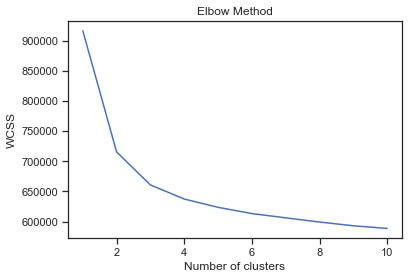

In [297]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_data_sub_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [298]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_data_sub_std)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


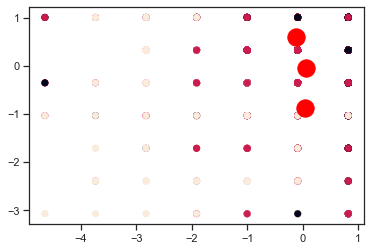

In [299]:
plt.scatter(df_data_sub_std.ix[:,4], df_data_sub_std.ix[:,5], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [300]:
df_data_sub_std['pred'] = pred_y
df_data_sub_std.groupby('pred').describe()

qxtime                                                                       qxoverallxqualityxindicators_1                                                                       qxoverallxqualityxindicators_2                                                                       qxoverallxqualityxindicators_3                                                                       qxoverallxqualityxindicators_4                                                                       qxactivitiesximportance_1                                                                       qxactivitiesximportance_2                                                                       qxactivitiesximportance_3                                                                       qxactivitiesximportance_4                                                                       qxactivitiesximportance_5                                                                       qxactivitiesximportance_6  \
       count      mean       std       min       25%       50%       75%       max                          count      mean       std       min       25%       50%       75%       max                          count      mean       std       min       25%       50%       75%       max                          count      mean       std       min       25%       50%       75%       max                          count      mean       std       min       25%       50%       75%       max                     count      mean       std       min       25%       50%       75%       max                     count      mean       std       min       25%       50%       75%       max                     count      mean       std       min       25%       50%       75%       max                     count      mean       std       min       25%       50%       75%       max                     count      mean       std       min       25%       50%       75%       max                     count   
pred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
0     1084.0 -0.119913  1.000908 -2.161439 -0.760797 -0.060476  0.639844  2.040486                         1084.0  0.598553  0.671644 -3.737796  0.201696  0.989595  0.989595  0.989595                         1084.0  0.629196  0.678837 -3.914081  0.183866  1.003455  1.003455  1.003455                         1084.0  0.565589  0.651071 -4.064226  0.078682  0.907264  0.907264  0.907264                         1084.0  0.512144  0.659249 -4.651722 -0.086699  0.826306  0.826306  0.826306                    1084.0  0.382794  0.852571 -3.072927 -0.354986  1.003984  1.003984  1.003984                    1084.0  0.317614  0.752045 -4.748074 -0.227819  0.676232  0.676232  0.676232                    1084.0  0.318533  0.986991 -2.408186 -0.018725  0.578640  1.176005  1.176005                    1084.0  0.294555  0.895734 -3.292562  0.174302  0.867675  0.867675  0.867675                    1084.0  0.421100  0.789432 -3.609582  0.149244  0.901009  0.901009  0.901009                    1084.0   
1     1501.0  0.066431

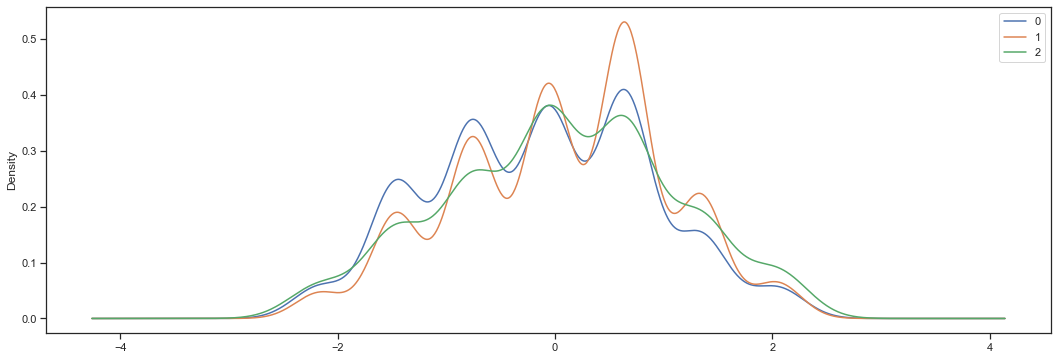

In [302]:
fig, ax = plt.subplots(figsize=(18,6))

for name, group in df_data_sub_std.groupby('pred'):
    group['qxtime'].plot( kind='kde', ax=ax, label=name, legend=True)

plt.show()

pred
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: qxtime, dtype: object

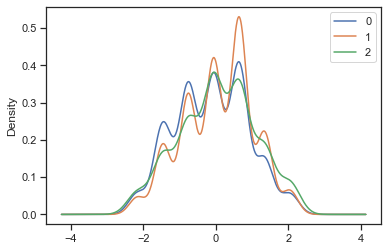

In [303]:
df_data_sub_std.groupby('pred')['qxtime'].plot(kind='kde', ax=plt.gca(), legend=True)


In [304]:
df_data_sub_std.shape

(3254, 1077)

In [305]:
# fig, axes = plt.subplots(22,5, figsize=(150,50))
# for col, ax in zip(df_data_sub_std.columns, axes.flatten()):
# #     group.plot(x='brent', y='sp500', kind='scatter', ax=ax, title=year)
#     try:
#         df_data_sub_std.groupby('pred')[col].plot(kind='kde', ax=ax, title=col)
#     except:
#         print('error: '+col)

# Save Each Plot to PDF 

qxoverallxqualityxindicators_1
qxoverallxqualityxindicators_2
qxoverallxqualityxindicators_3
qxoverallxqualityxindicators_4
qxactivitiesximportance_1
qxactivitiesximportance_2
qxactivitiesximportance_3
qxactivitiesximportance_4
qxactivitiesximportance_5
qxactivitiesximportance_6
qxactivitiesximportance_7
qxactivitiesximportance_8
qxactivitiesximportance_9
qxactivitiesximportance_10
qxactivitiesximportance_11
qxactivitiesximportance_12
qxactivitiesximportance_13
qxactivitiesximportance_14
qxactivitiesximportance_15
qxactivitiesximportance_16
qxactivitiesximportance_17


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesximportance_18


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesximportance_19


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesximportance_20


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesximportance_21


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesximportance_22


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesximportance_23


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesximportance_24


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesximportance_25


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_2


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_3


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_4


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_5


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_6


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_7


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_8


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_9


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_11


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_12


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_13


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_14


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_15


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_16


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_17


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_18


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_19


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_20


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_21


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_22


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_23


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_24


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxrecency_25


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_2


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_2


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_2


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_2


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_3


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_3


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_3


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_3


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_4


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_4


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_4


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_4


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_5


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_5


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_5


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_5


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_6


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_6


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_6


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_6


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_7


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_7


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_7


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_7


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_8


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_8


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_8


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_8


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_9


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_9


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_9


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_9


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_11


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_11


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_11


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_11


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_12


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_12


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_12


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_12


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_13


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_13


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_13


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_13


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_14


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_14


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_14


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_14


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_15


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_15


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_15


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_15


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_16


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_16


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_16


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_16


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_17


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_17


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_17


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_17


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_18


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_18


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_18


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_18


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_19


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_19


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_19


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_19


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_20


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_20


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_20


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_20


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_21


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_21


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_21


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_21


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_22


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_22


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_22


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_22


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_23


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_23


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_23


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_23


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_24


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_24


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_24


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_24


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_1_25


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_2_25


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_3_25


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxqualityxindicators_4_25


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_2


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_3


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_4


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_5


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_6


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_7


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_8


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_9


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_11


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_12


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_13


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_14


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_15


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_16


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_17


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_18


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_19


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_20


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_21


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_22


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_23


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_24


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxsatisfaction_25


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxadvocacy01_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxadvocacy02_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxretention_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxenrichment_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxbrandxlove_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxbrandxtrustxdrivers_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxbrandxtrustxdrivers_2


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxbrandxtrustxdrivers_3


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxbrandxtrustxdrivers_4


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_2


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_3


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_4


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_5


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_6


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_7


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_8


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_9


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_11


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_12


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_13


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_14


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_15


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_16


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_17


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_18


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_19


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_20


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_21


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_22
qxdrivers_23


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_24


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_25


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_26


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_27


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_28


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_29


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_30


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_31


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_32


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_33


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxdrivers_34


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


qxactivitiesxdrivers_1_1
qxactivitiesxdrivers_2_1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


LinAlgError: singular matrix

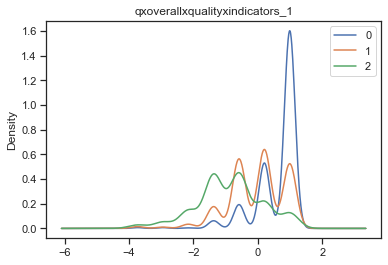

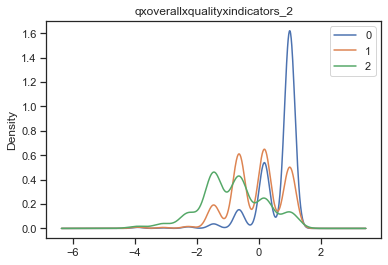

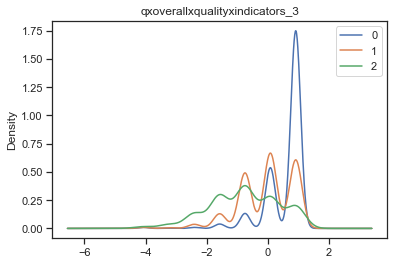

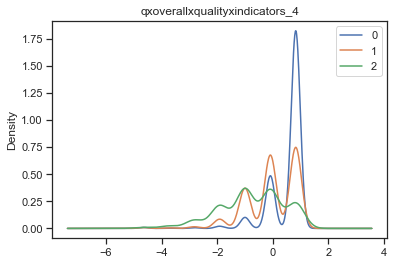

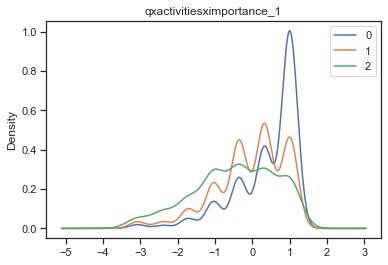

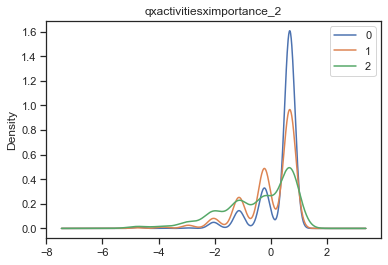

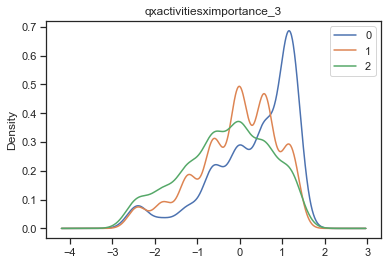

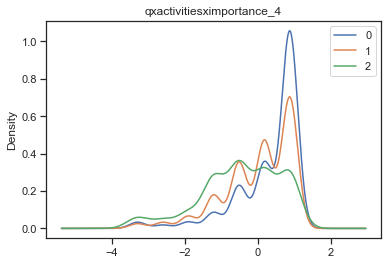

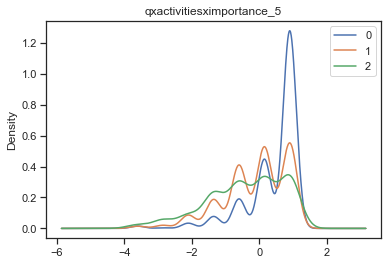

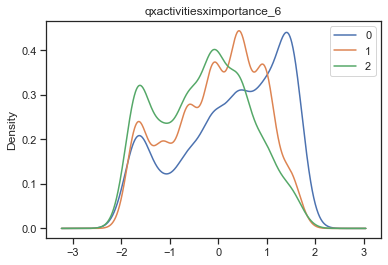

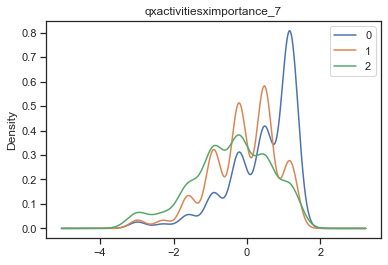

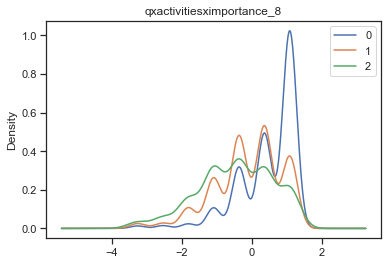

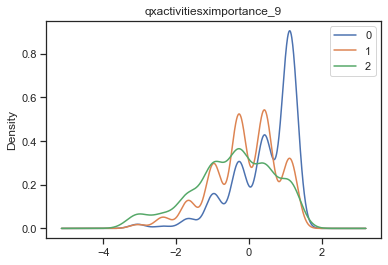

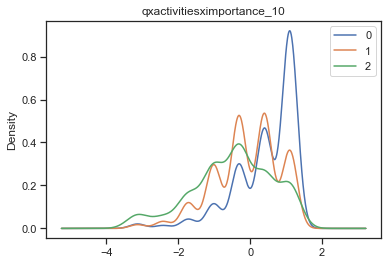

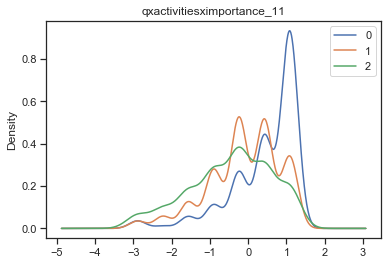

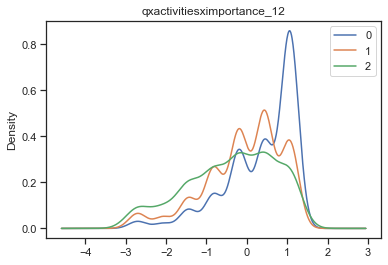

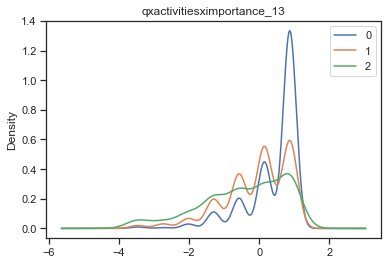

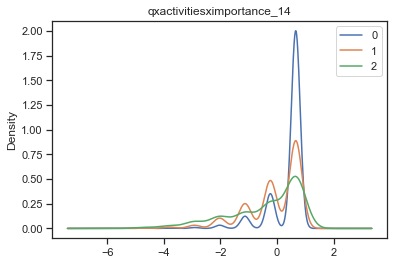

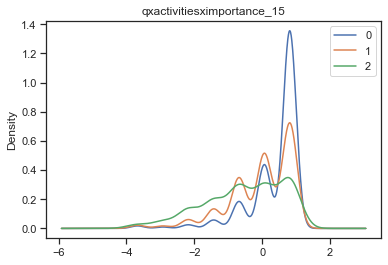

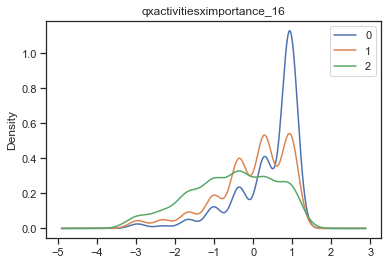

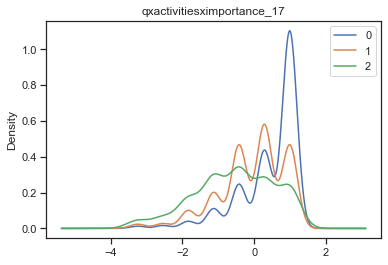

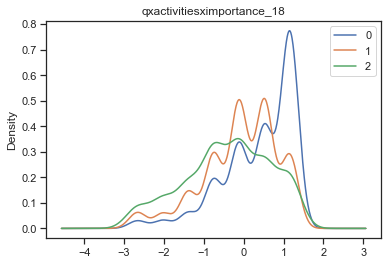

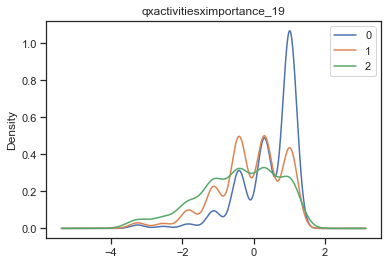

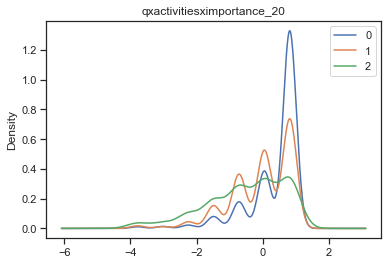

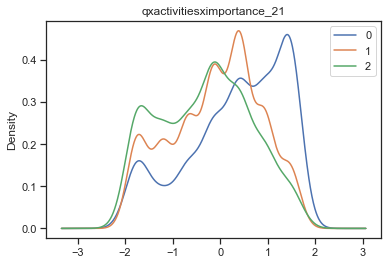

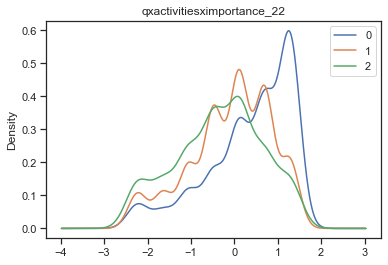

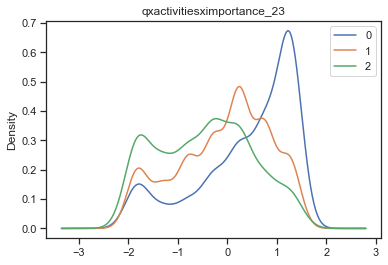

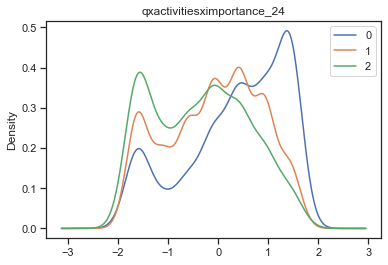

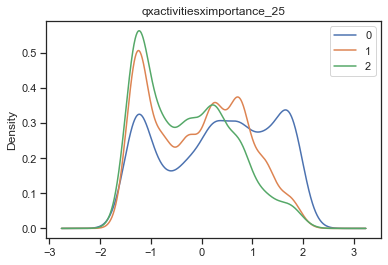

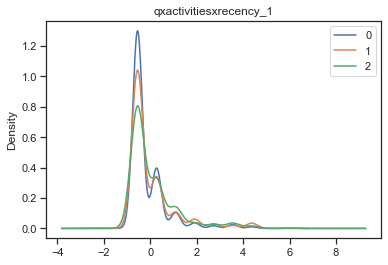

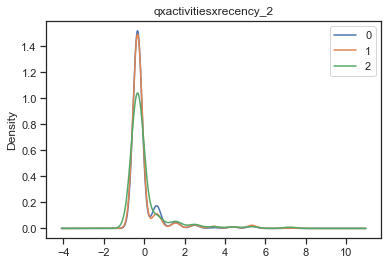

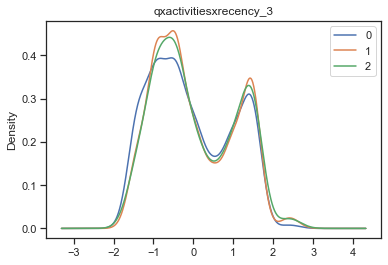

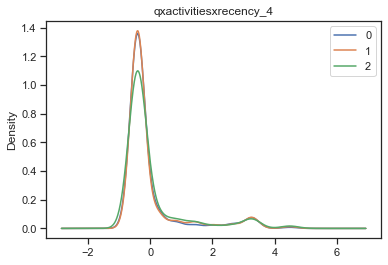

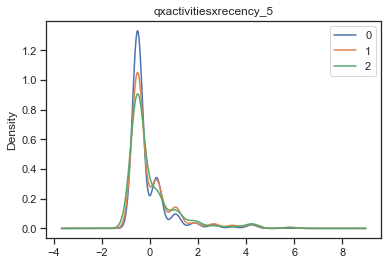

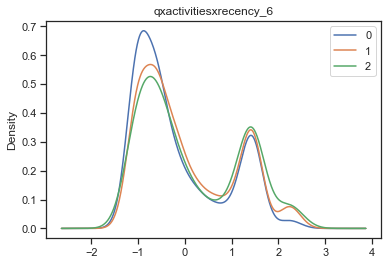

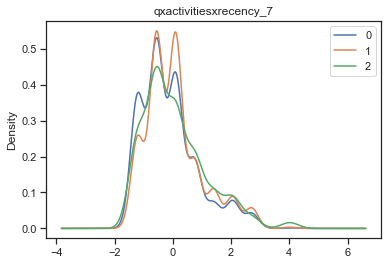

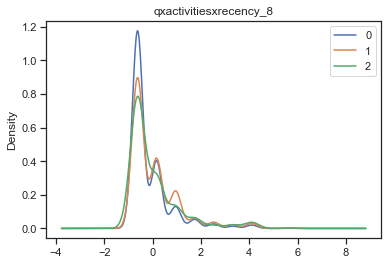

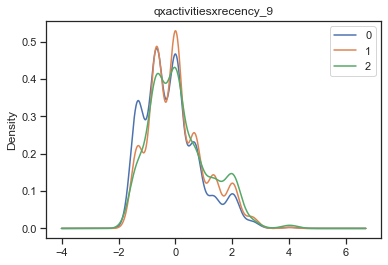

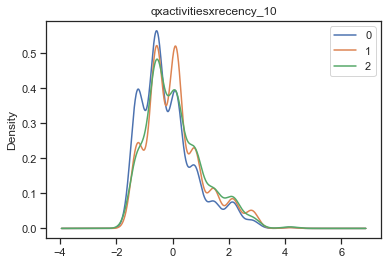

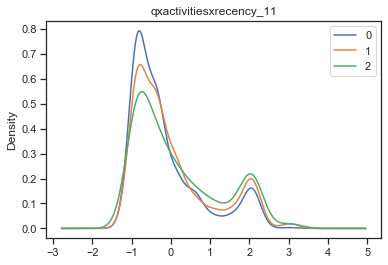

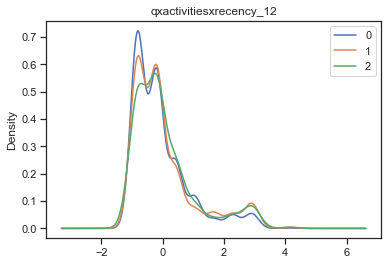

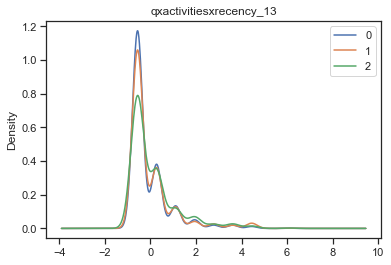

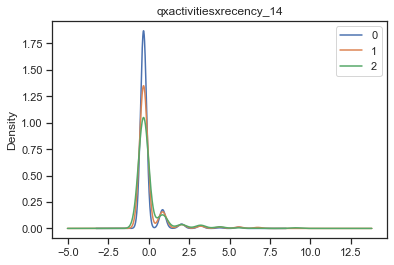

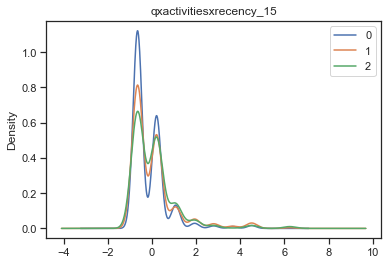

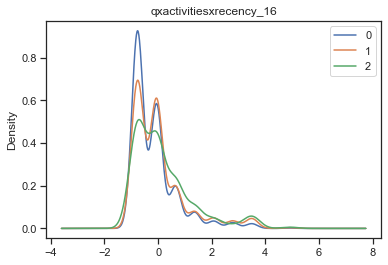

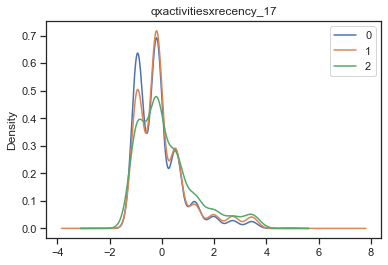

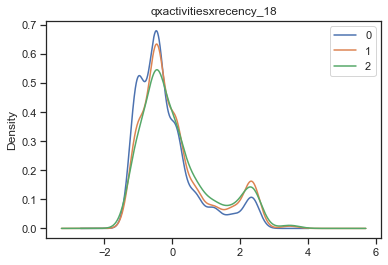

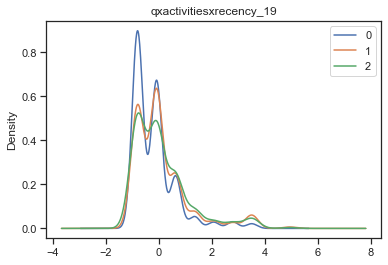

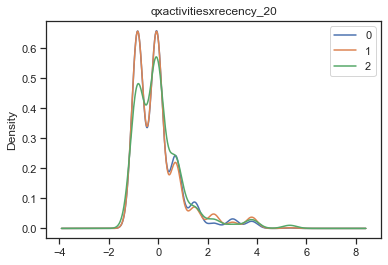

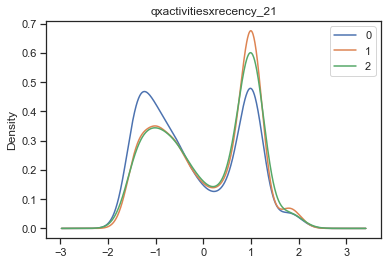

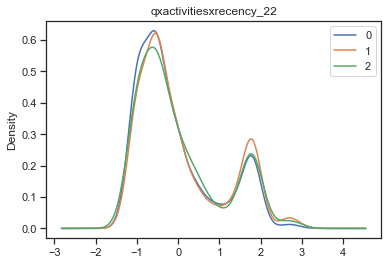

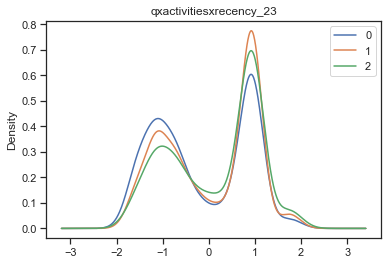

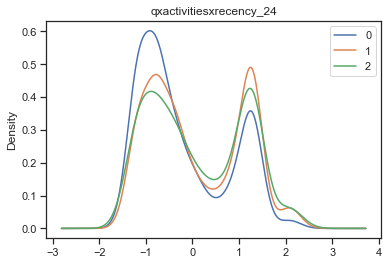

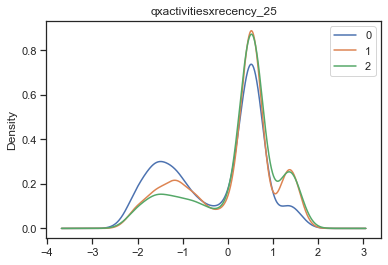

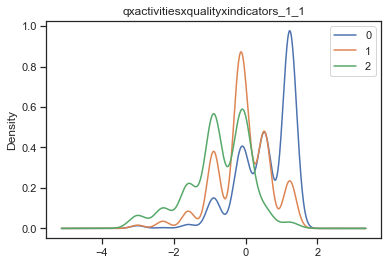

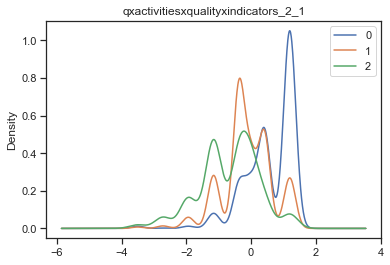

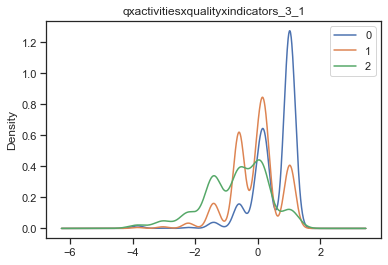

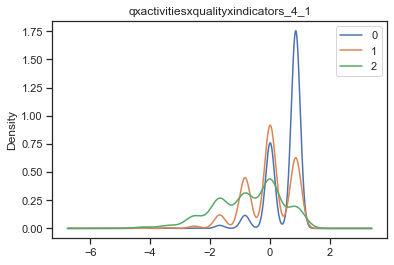

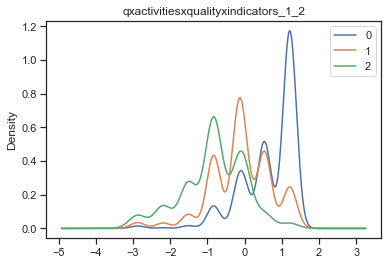

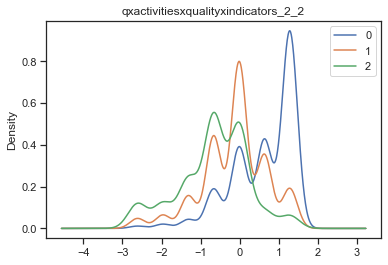

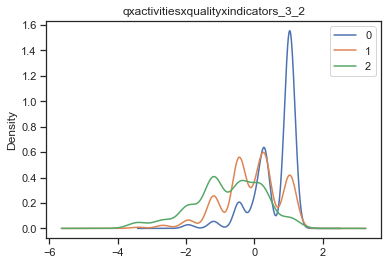

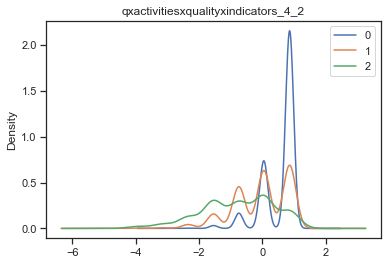

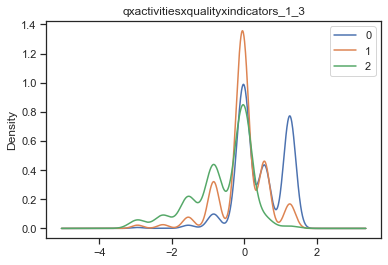

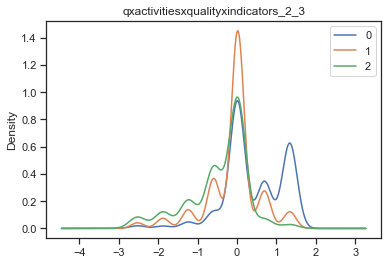

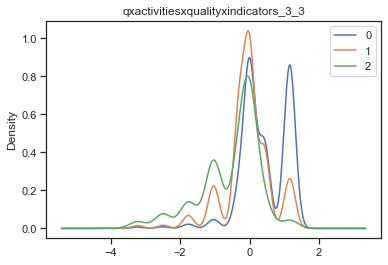

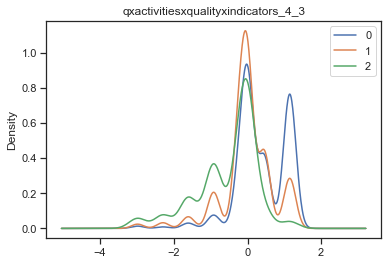

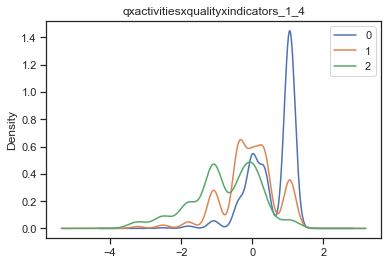

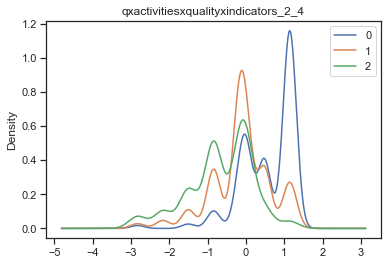

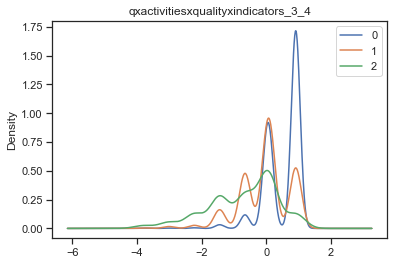

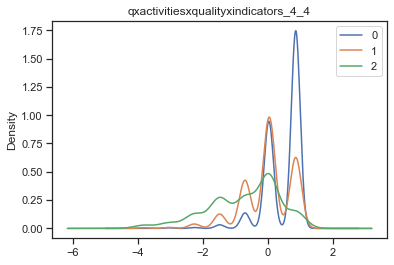

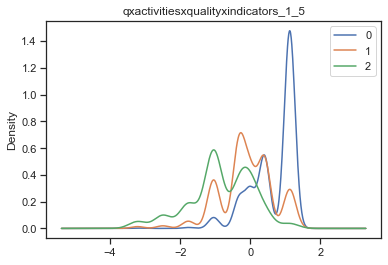

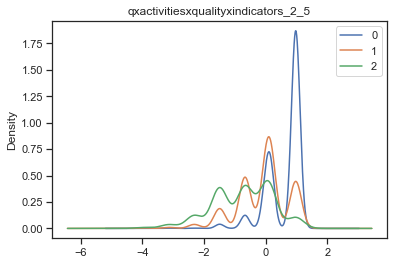

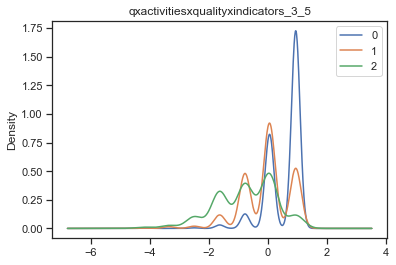

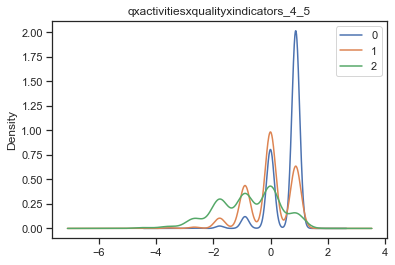

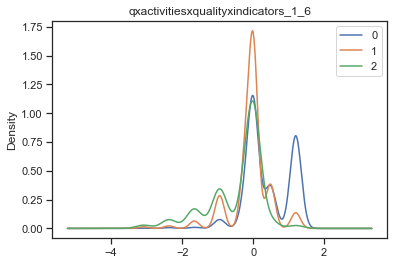

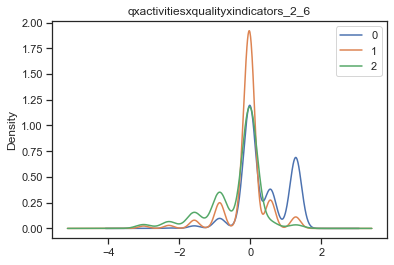

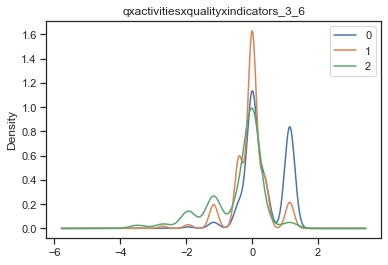

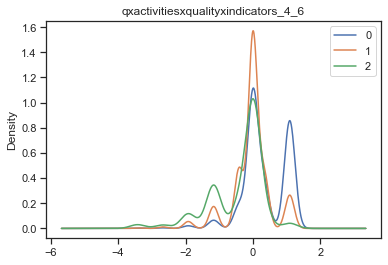

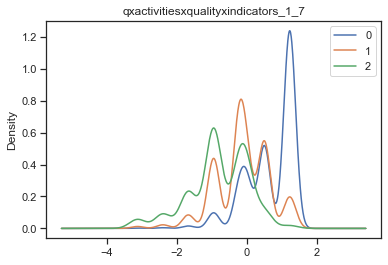

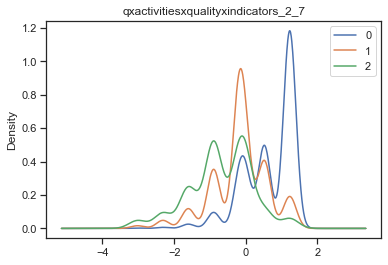

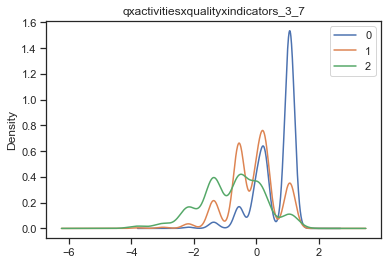

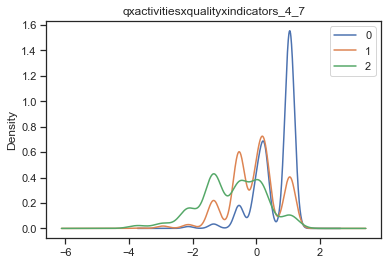

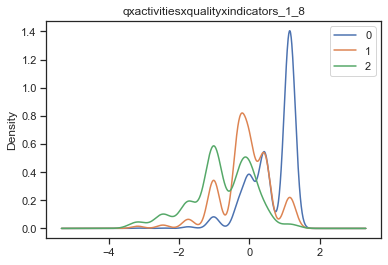

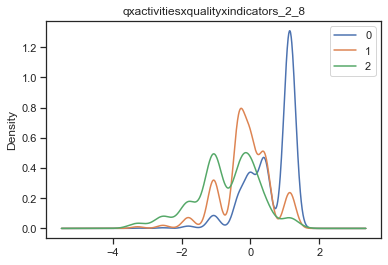

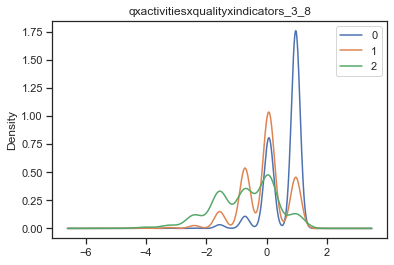

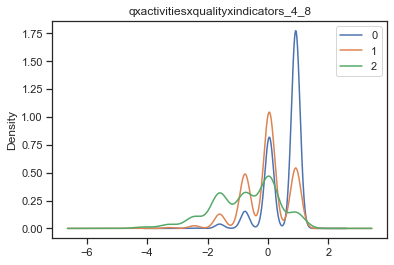

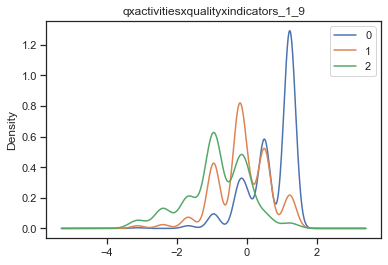

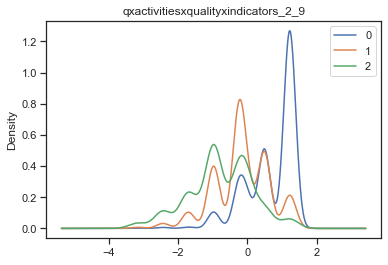

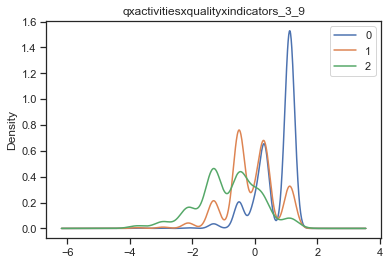

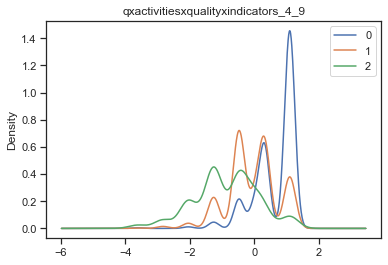

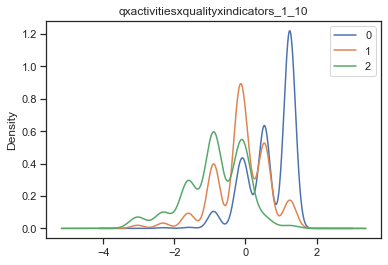

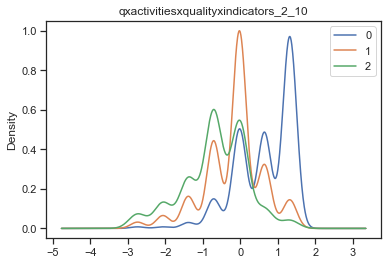

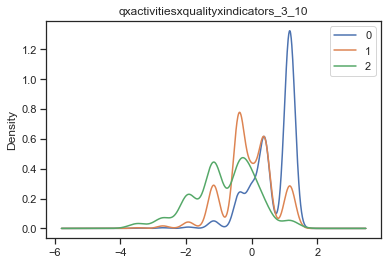

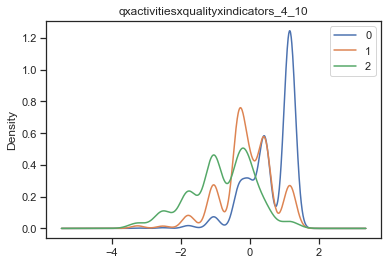

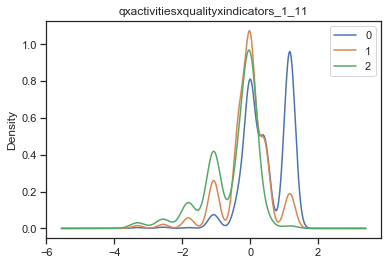

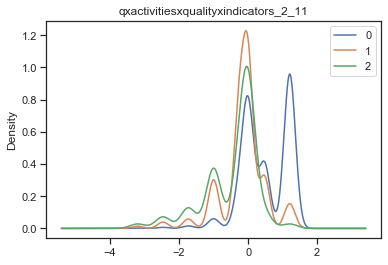

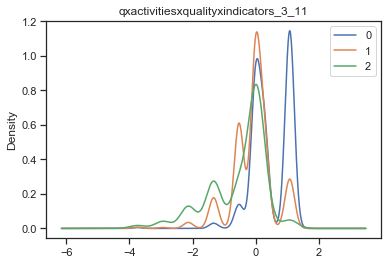

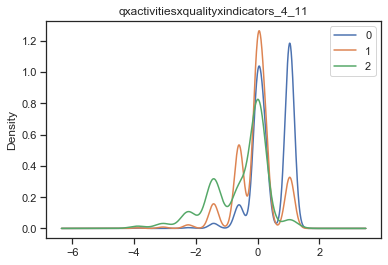

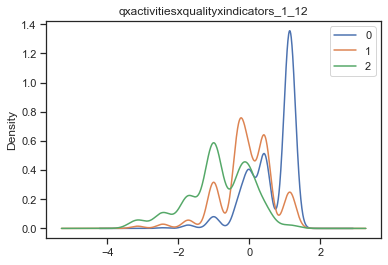

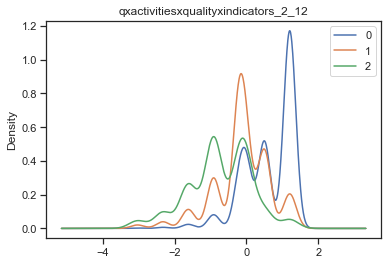

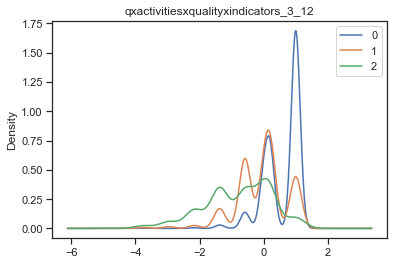

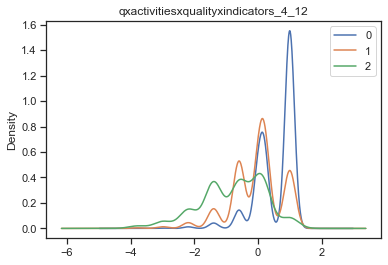

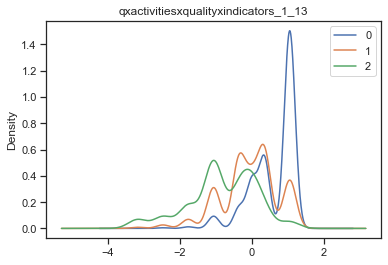

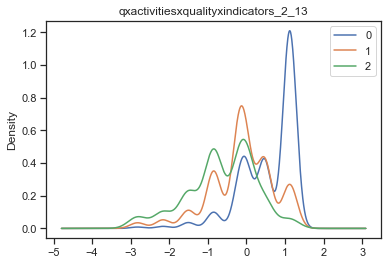

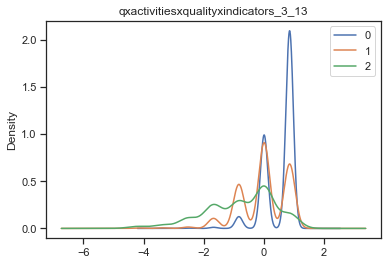

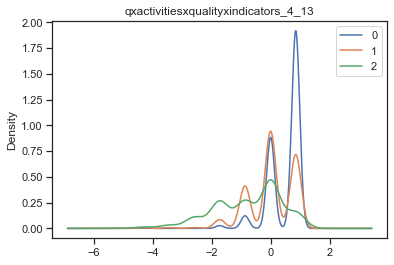

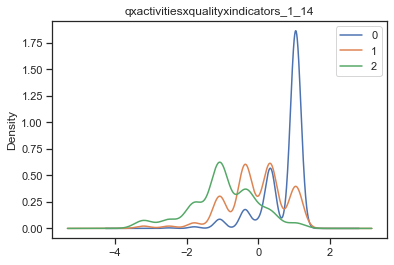

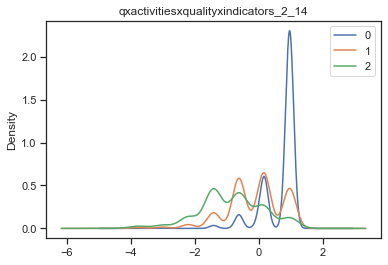

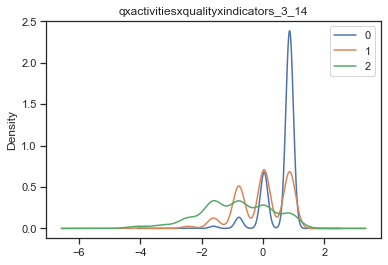

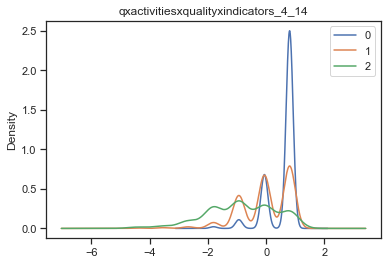

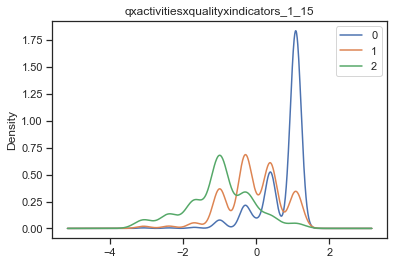

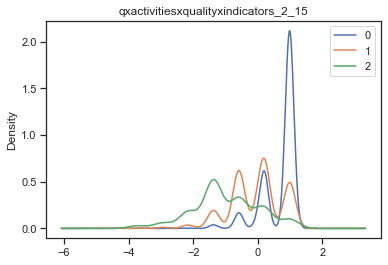

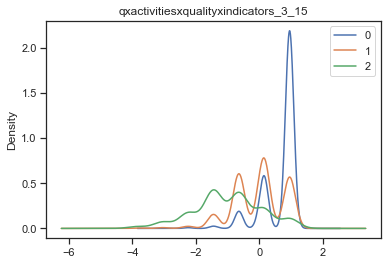

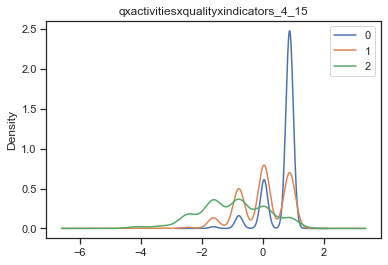

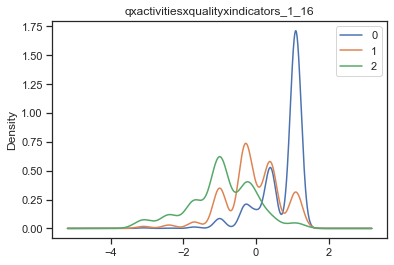

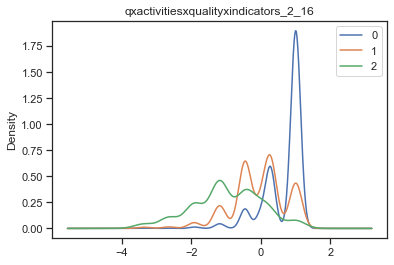

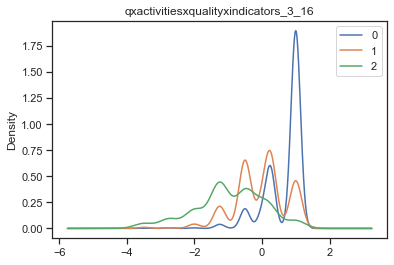

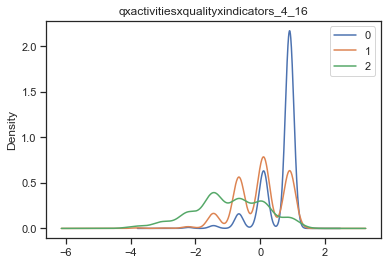

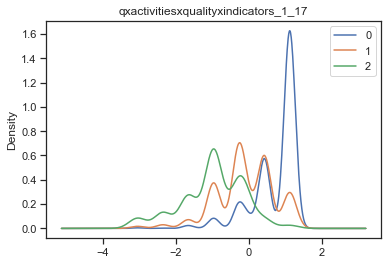

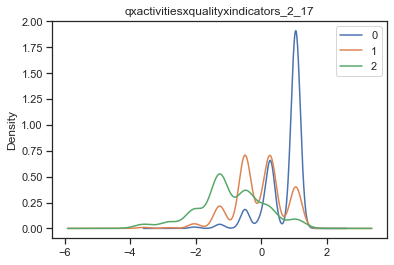

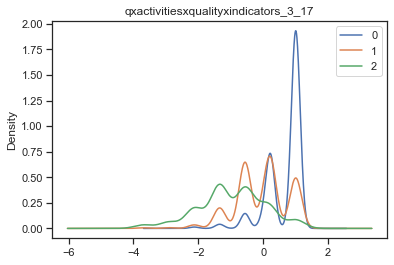

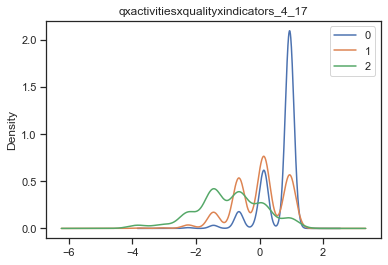

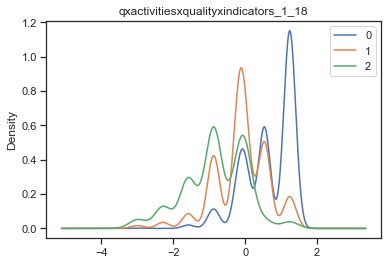

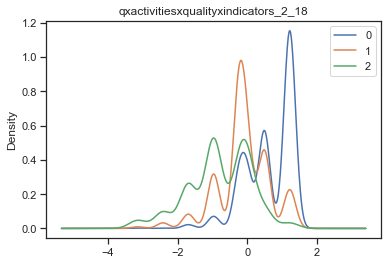

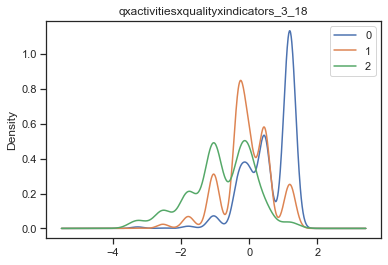

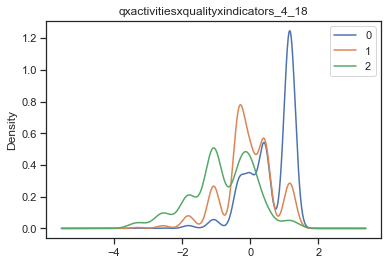

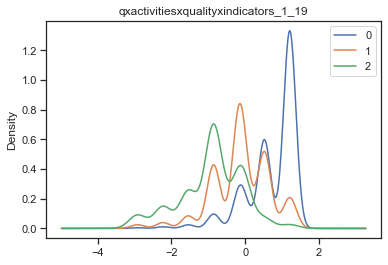

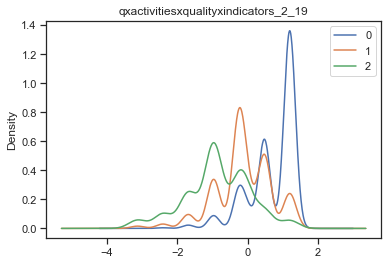

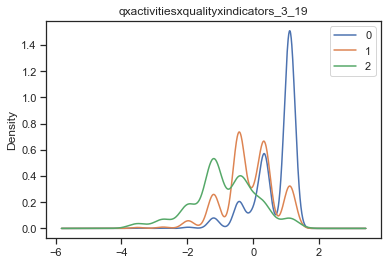

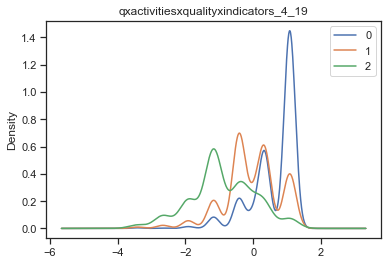

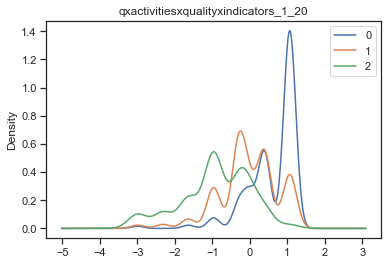

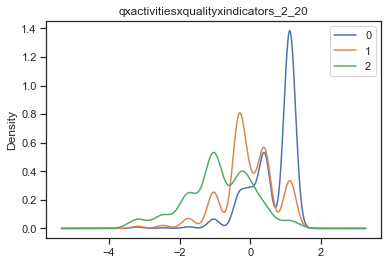

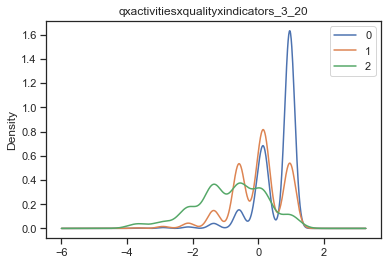

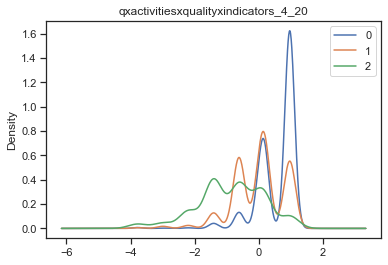

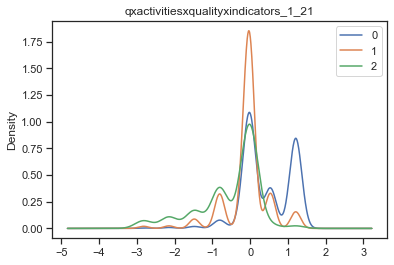

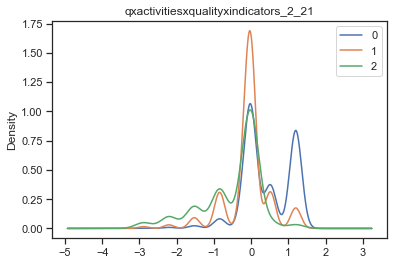

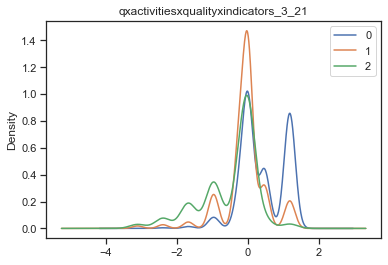

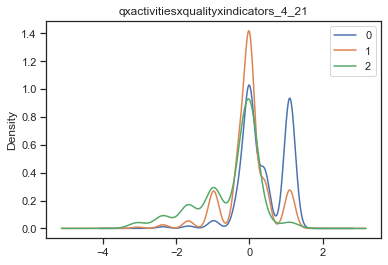

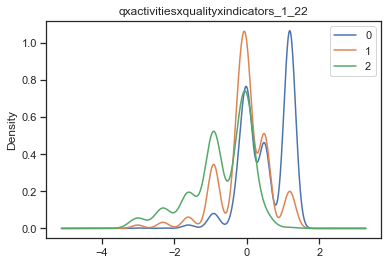

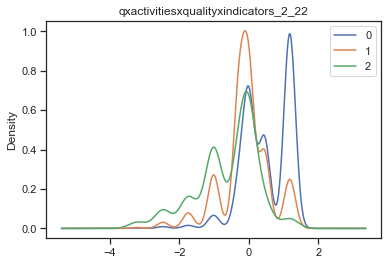

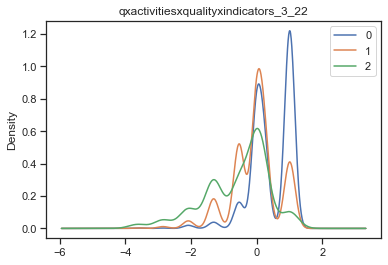

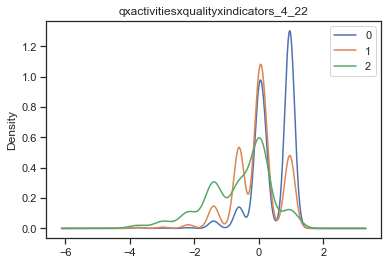

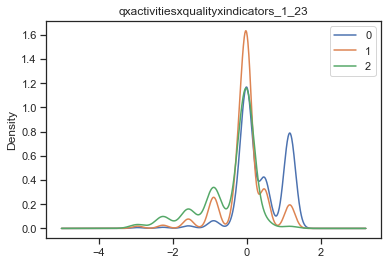

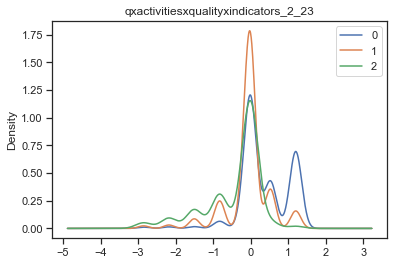

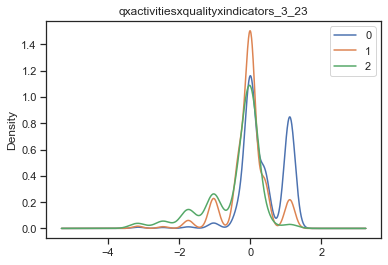

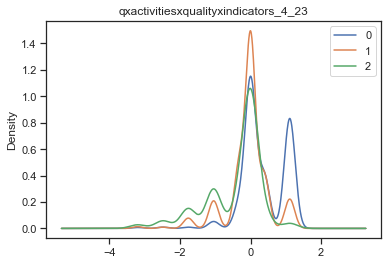

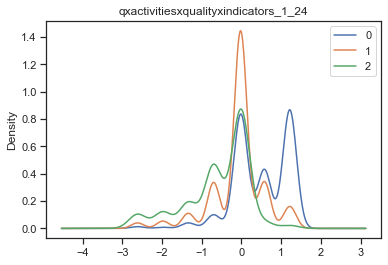

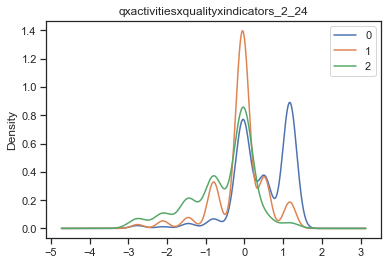

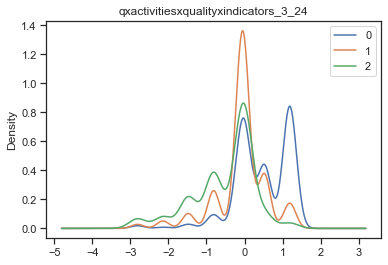

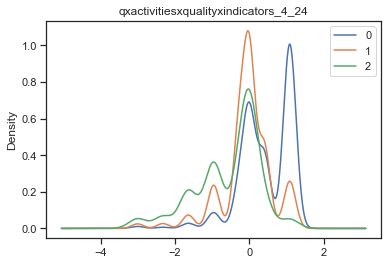

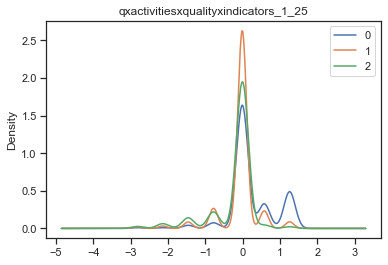

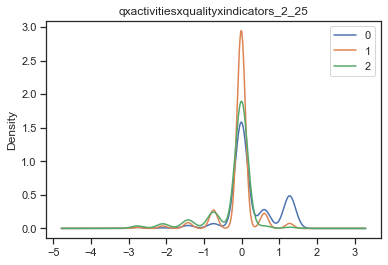

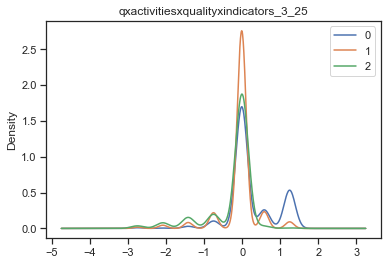

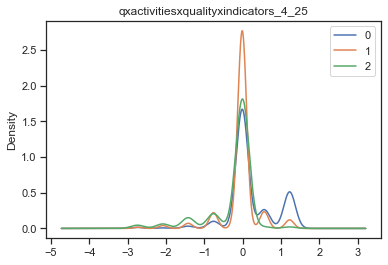

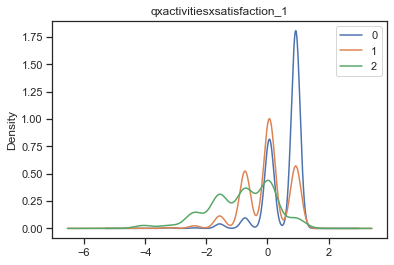

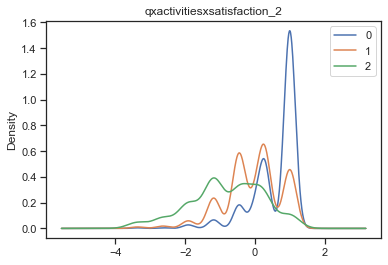

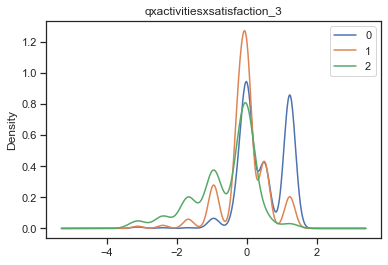

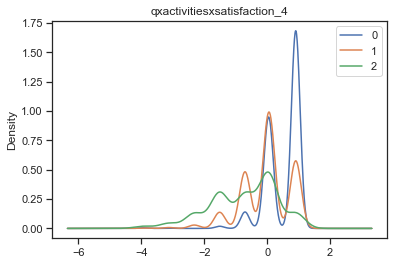

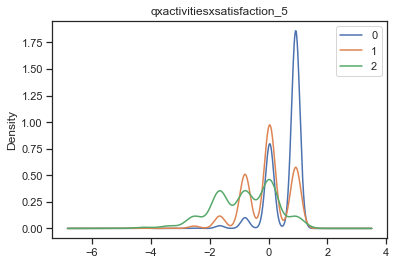

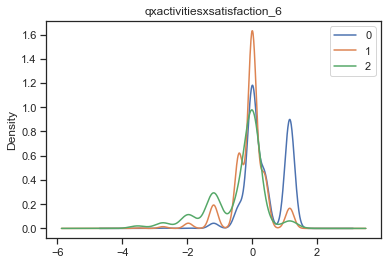

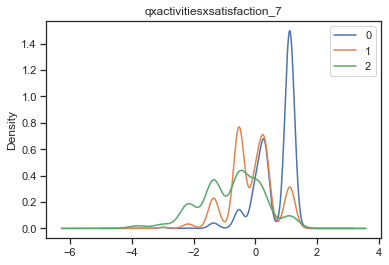

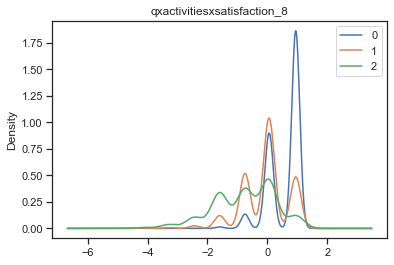

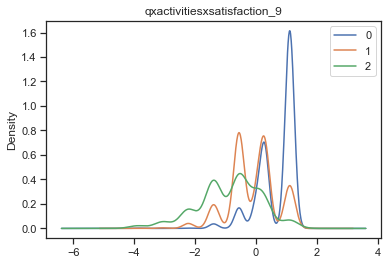

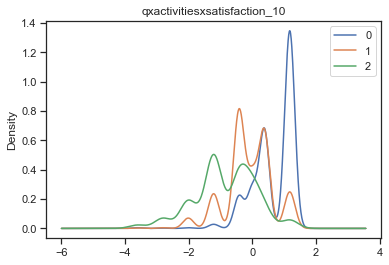

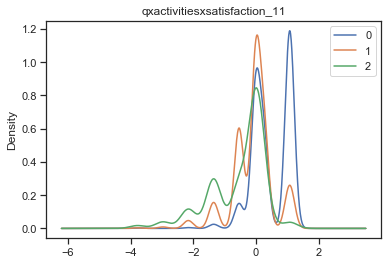

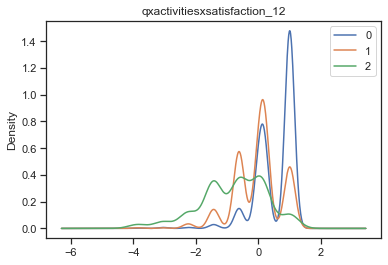

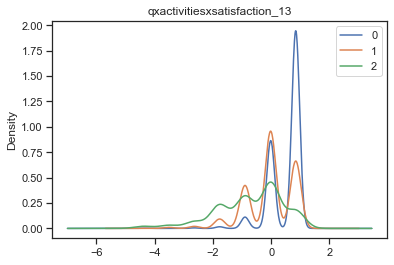

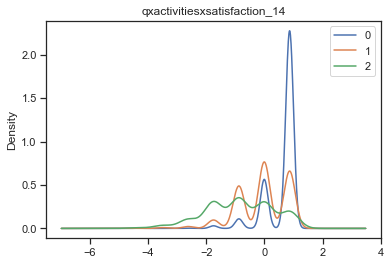

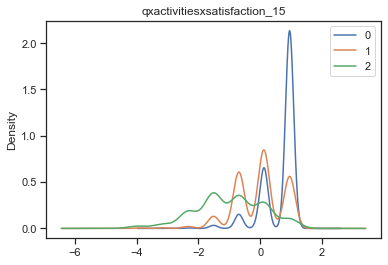

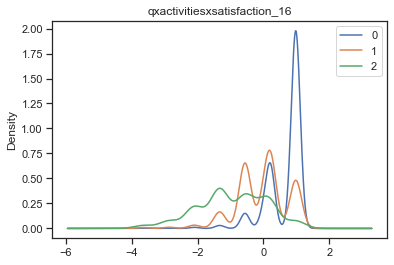

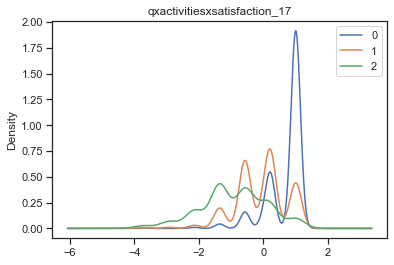

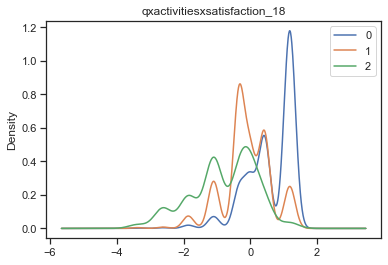

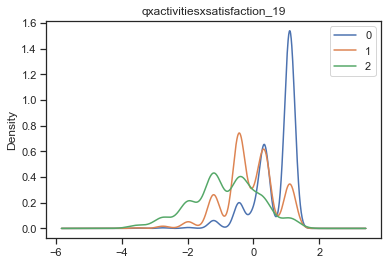

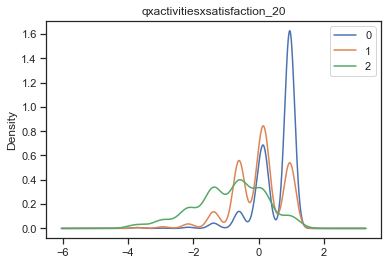

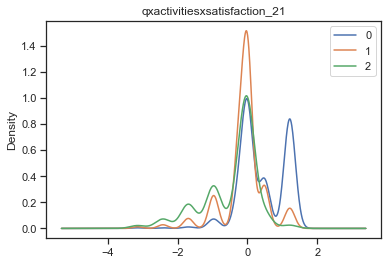

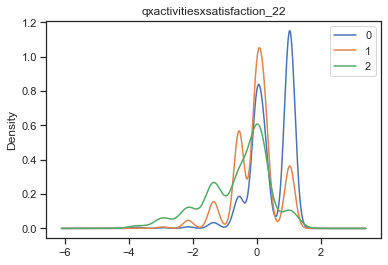

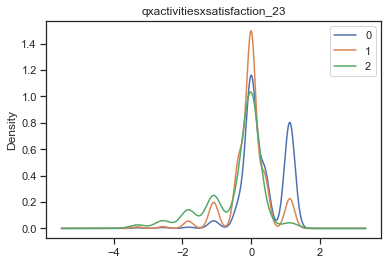

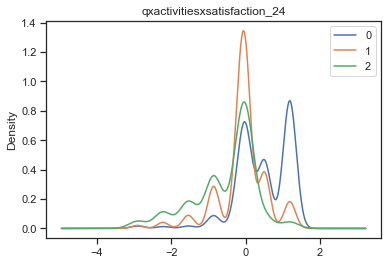

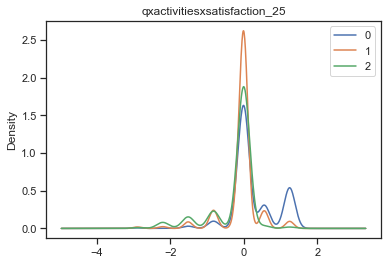

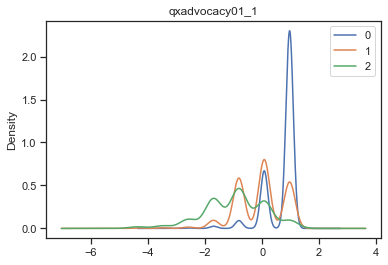

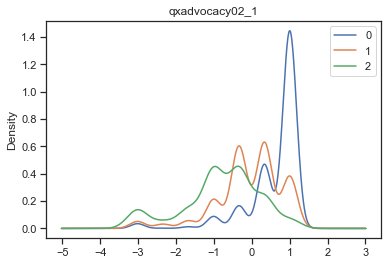

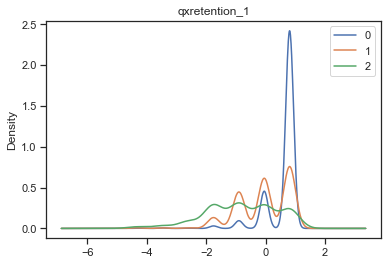

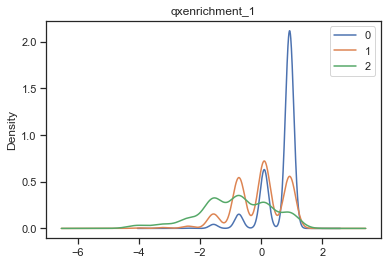

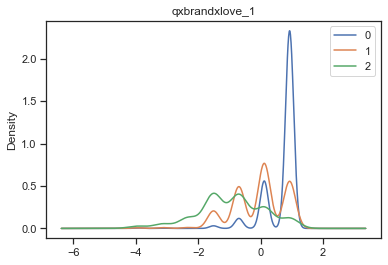

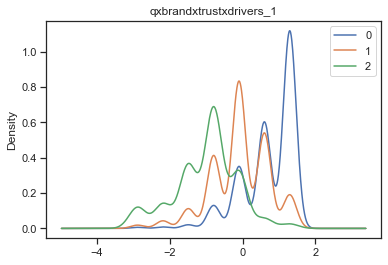

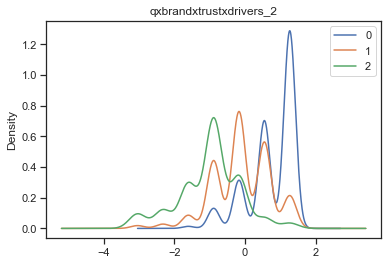

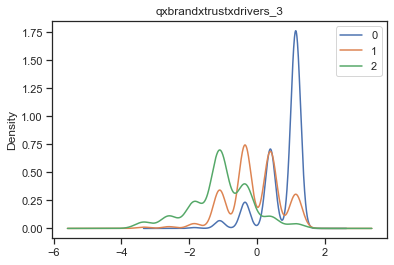

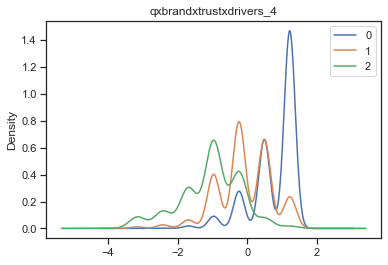

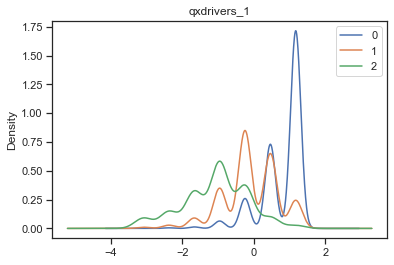

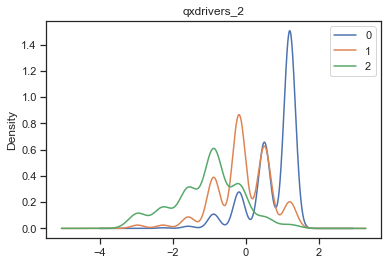

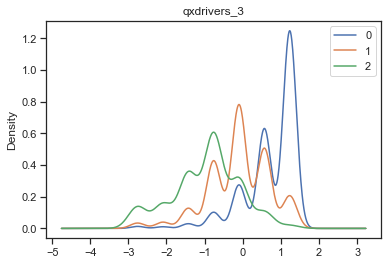

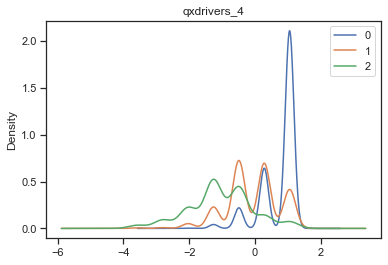

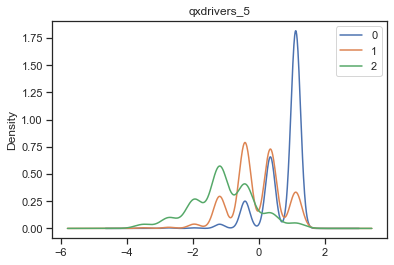

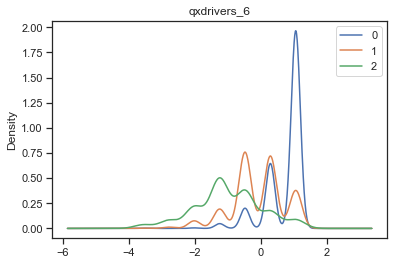

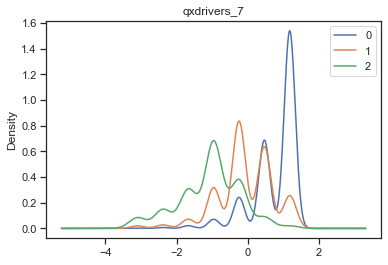

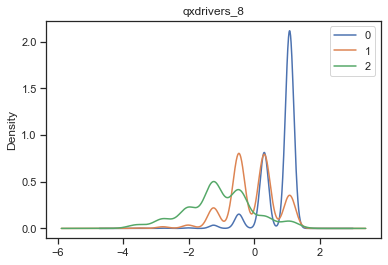

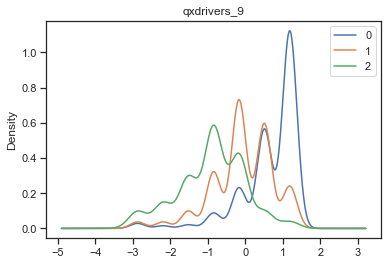

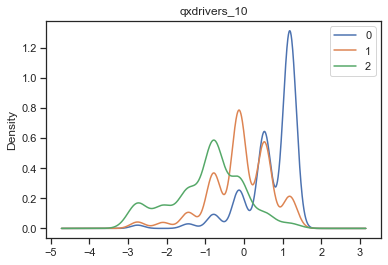

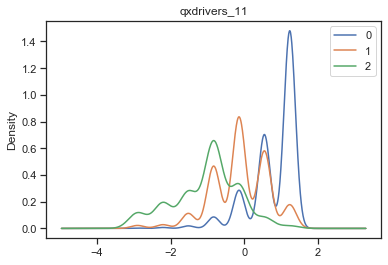

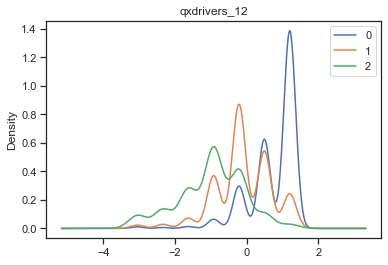

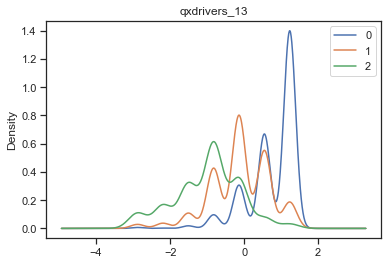

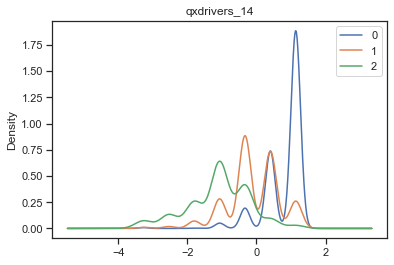

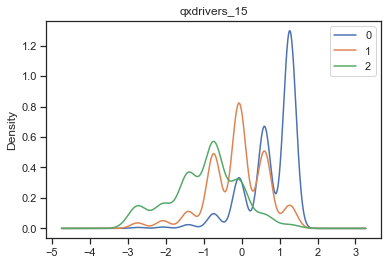

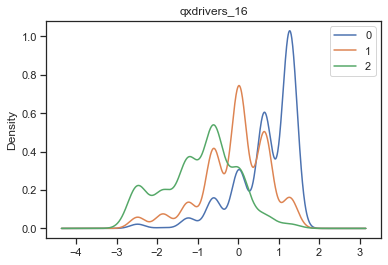

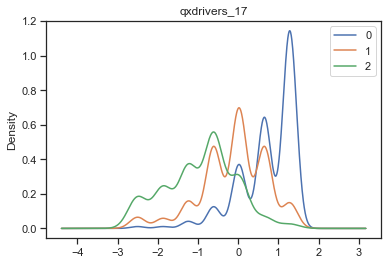

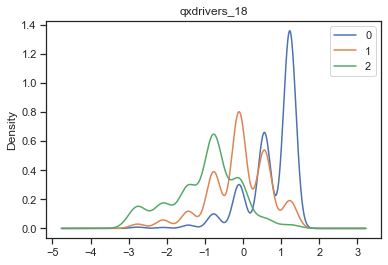

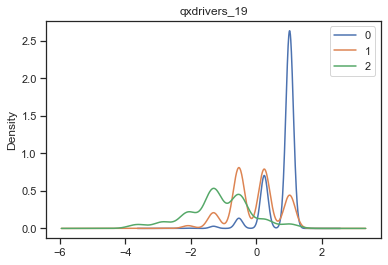

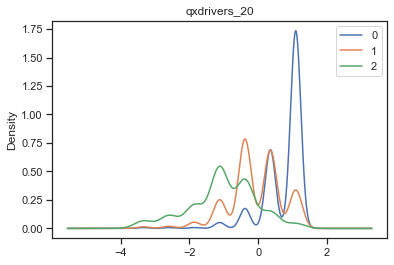

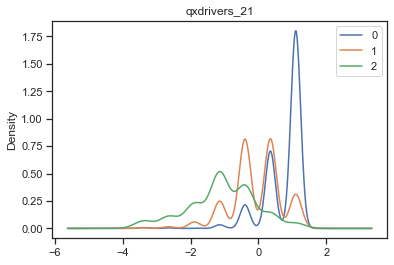

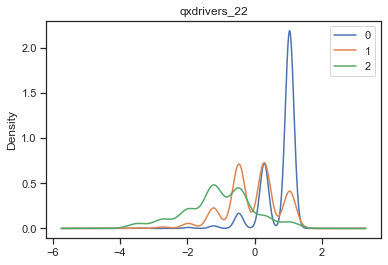

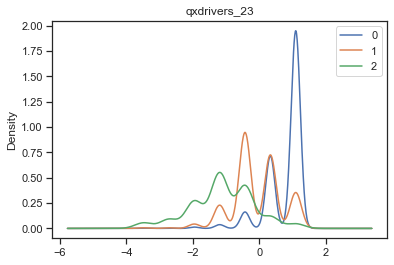

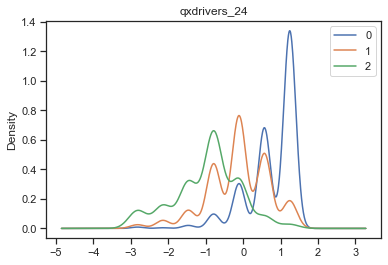

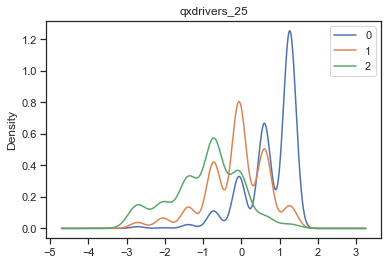

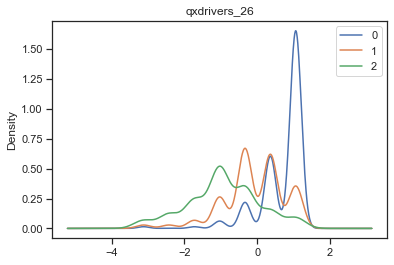

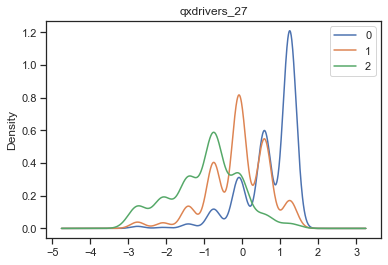

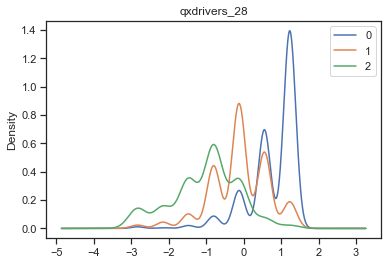

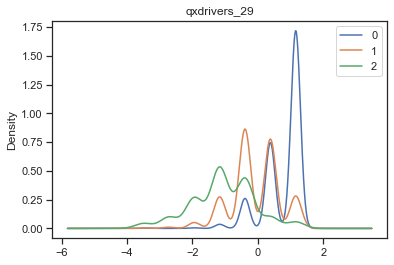

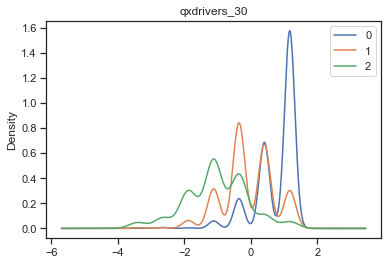

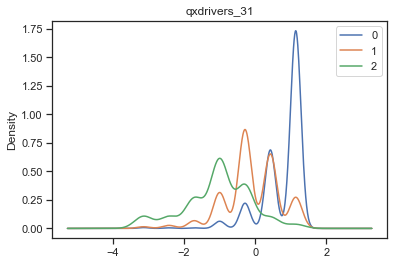

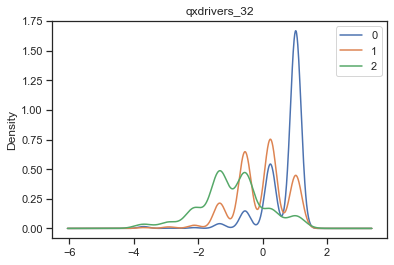

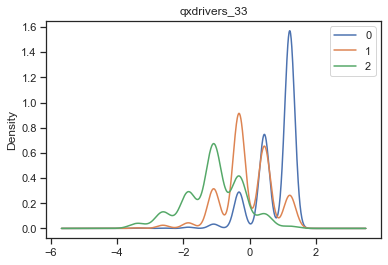

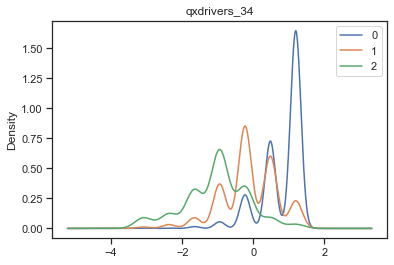

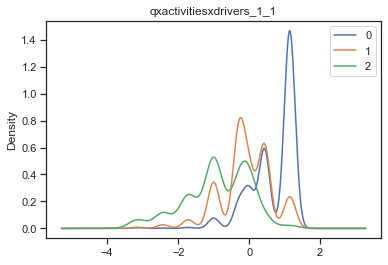

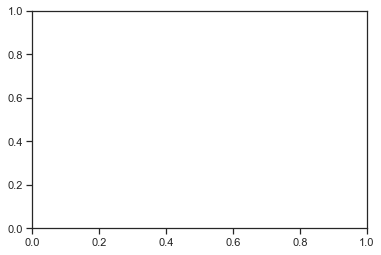

In [306]:
# pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
with PdfPages('output2.pdf') as pdf:
    for col in df_data_sub_std.columns[1:]:
        print(col)
        plt.figure()
        fig=df_data_sub_std.groupby('pred')[col].plot(kind='kde', title=col, legend=True)[0].get_figure()
        pdf.savefig(fig)


# Observations

# overall.pdf -- lacks variables that gor coerced to numeric
Cluster 1 has much higher values; cluster 2 much lower values 
for all qxoverallxqualityxindicators (overall trust, overall feeling, overall function, overall simplicity)
 Cluster 1 has much higher values; cluster 2 much lower values 
qxactivitiesximportance_1 
( How important is it for you that a smartphone performs well [Using speaker phone (including all aspects of it, such as dialing, quality of sound, etc.)])
qxactivitiesximportance_3, 4, 5, 6, 7, 8, 9
 Cluster 2 has comparable values for 
qxactivitiesximportance_2
(How important is it for you that a smartphone performs well  [Charging battery (including wired charge, wireless charge, different charge options, the accuracy of the battery indicator, etc.)])

 Cluster 1 tends to rate all activities as important, Cluster 2 as not important and Cluster 0 as somewhere in between, similarly for overall quality indicators. Except for qxactivitiesximportance_2 (How important is it for you that a smartphone performs well  [Charging battery (including wired charge, wireless charge, different charge options, the accuracy of the battery indicator, etc.)]) where cluster 2 has comprable values to cluster 1.

 Recency is simolarly distributed across all clusters but with higher (less recent values) for Cluster 2. Except for \_25 (Using an AR)
first 5 recencies similarly distributed -- the basics



 qxadvocacy01_, qxretention, qxenrichment_, qxbrandxlove_, qxbrandxtrustxdrivers, qxdrivers  much higher for C1 than C2 (C0 somewhere in between)

 qxunlocking similarly distributed across all clusters

 So C1 very engaged 



# overall2.pdf 
qxoverallxqualityxindicators_N:
C0 higher; C2 lower 
(for all N)

qxactivitiesximportance_N:
C0 higher , C2 lower
(for all N except 2)
see 21, 24, 25 for most striking difference

qxactivitiesxrecency_N 
same for all groups
for all N 

qxactivitiesxqualityxindicators
C0 higher; C2 lower 
(for all N)

qxactivitiesxsatisfaction
C0 higher; C2 lower 
(for all N)

qxbrandxtrustxdrivers
C0 higher; C2 lower 
(for all N)

qxdrivers_
C0 higher; C2 lower 
(for all N)

qxactivitiesxdrivers_
C0 higher; C2 lower 
(for all N)

# attribute distributions by cluster

In [307]:
df_data['pred'] = pred_y

In [308]:
cols = ['WEIGHT', 'd2', 'hidagemodels', 'qxcurrentxmodel', 'hbrand', 'hmodelquota',\
       'd1', 'd3_1', 'd3_2', 'd3_3', 'd3_4', 'd4', 'd5x1', 'd5x2', 'd6', 'd7_1',\
        'd7_2', 'd7_3','d7_4', 'd7_5','d7_97', 'd7_99','d7_97_other', 'UX_Loyalty','UXindex']
df_data.groupby('pred')[cols].describe()

WEIGHT                                                                            d2                                                    hidagemodels                                              qxcurrentxmodel                                                      hbrand                                              hmodelquota                                                     d1                                                 d3_1                                                 d3_2                                                 d3_3                                                 d3_4                                                   d4                                                 d5x1                                                    UX_Loyalty                                                             UXindex                                                                        
       count      mean       std       min       25%       50%       75%       max   count       mean       std   min   25%   50%   75%   max        count      mean       std  min  25%  50%  75%  max           count       mean        std   min   25%   50%   75%   max   count      mean       std  min  25%  50%  75%  max       count      mean       std  min  25%  50%   75%   max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count       mean        std  min   25%   50%   75%   max      count      mean       std       min       25%  50%       75%  max   count       mean        std       min        25%        50%        75%    max
pred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
0     1084.0  1.037752  0.865371  0.030322  0.468818  0.945079  1.334853  7.207765  1084.0  29.641144  5.406419  18.0  26.0  30.0  34.0  38.0       1084.0  2.311808  0.732196  1.0  2.0  2.0  3.0  3.0          1084.0  24.592251  10.345186  11.0  15.0  23.0  31.0  53.0  1084.0  2.095941  1.085463  1.0  1.0  2.0  3.0  5.0      1084.0  7.676199  5.274317  1.0  3.0  6.0  13.0  17.0  1084.0  1.698339  0.465184  1.0  1.0  2.0  2.0  3.0  1084.0  0.162362  0.368952  0.0  0.0  0.0  0.0  1.0  1084.0  0.673432  0.469174  0.0  0.0  1.0  1.0  1.0  1084.0  0.027675  0.164116  0.0  0.0  0.0  0.0  1.0  1084.0  0.177122  0.381948  0.0  0.0  0.0  0.0  1.0  1084.0  4.011070  1.414823  1.0  3.0  4.0  5.0  7.0  1084.0  25.023063  15.384227  1.0  10.0  24.0  39.0  98.0     1084.0  6.639145  0.518001  3.666667  6.333333  7.0  7.000000  7.0  1084.0  87.124506  15.560443  0.000000  77.740700  91.754658  100.00000  100.0
1     1501.0  1.007281  0.826007  0.030322  0.460022  0.948351  1.311854  7.207765  1501.0  28.817455  5.670860  18.0  24.0  29.0  34.0  38.0       1501.0  2.205197  0.790274  1.0  2.0  2.0  3.0  3.0          1501.0  27.855430  11.924083  11.0  18.0  26.0  34.0  53.0  1501.0  2.458361  1.255560  1.0  1.0  2.0  3.0  5.0      1501.0  8.111925  4.836334  1.0  4.0  8.0  13.0 

d2
hidagemodels
qxcurrentxmodel
hbrand
hmodelquota
d1
d3_1
d3_2
d3_3
d3_4
d4
d5x1
d5x2


TypeError: no numeric data to plot

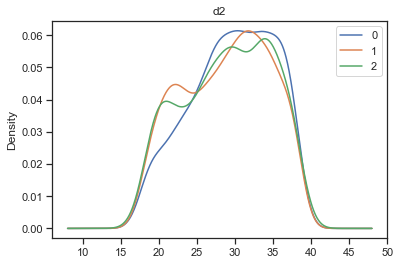

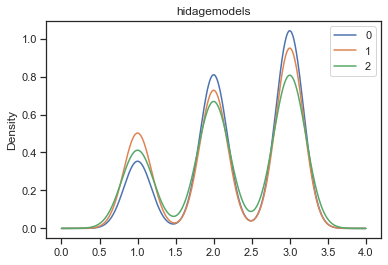

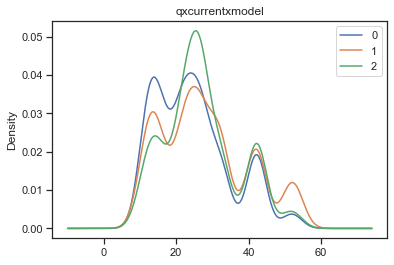

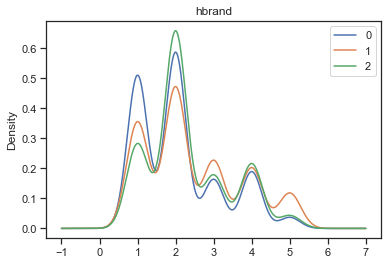

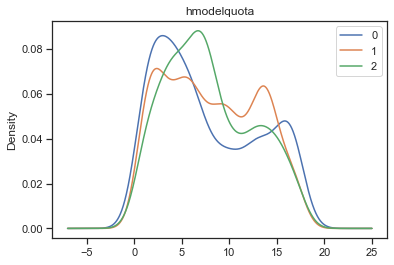

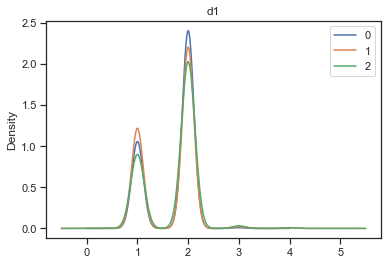

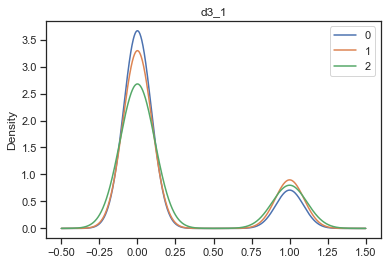

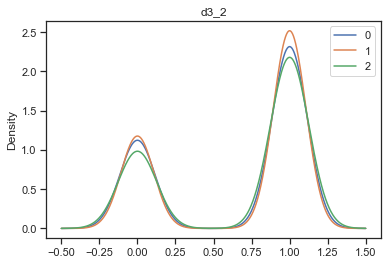

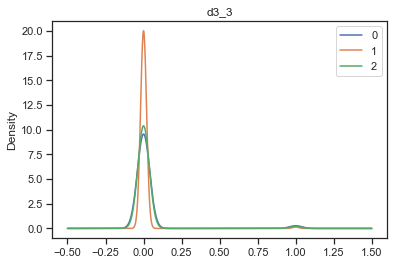

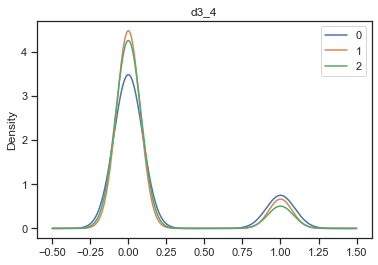

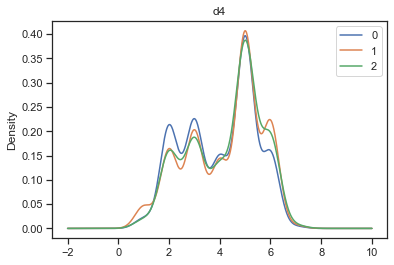

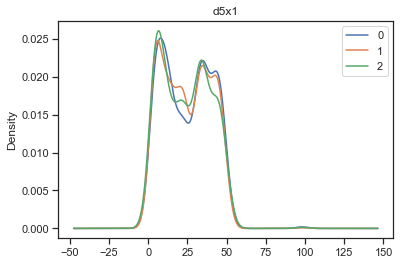

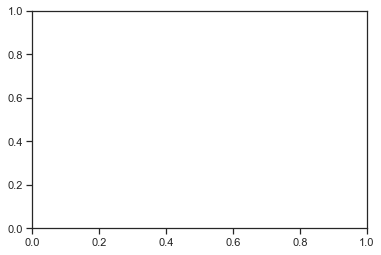

In [309]:
# pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")

with PdfPages('attributes2.pdf') as pdf:
    for col in df_data[cols].columns[1:]:
        print(col)
        plt.figure()
        fig=df_data.groupby('pred')[col].plot(kind='kde', title=col, legend=True)[0].get_figure()
        pdf.savefig(fig)


# hbrand count by cluster

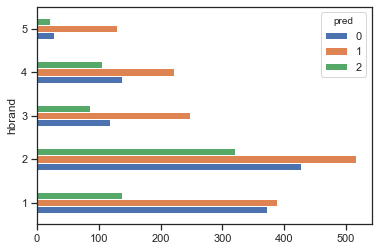

In [310]:
df_data.groupby('pred').hbrand.value_counts().unstack(0).plot.barh()

               hbrand
pred hbrand          
0    2       0.394834
     1       0.343173
     4       0.127306
     3       0.109779
     5       0.024908
1    2       0.343771
     1       0.258494
     3       0.164557
     4       0.147235
     5       0.085943
2    2       0.478326
     1       0.204783
     4       0.156951
     3       0.128550
     5       0.031390


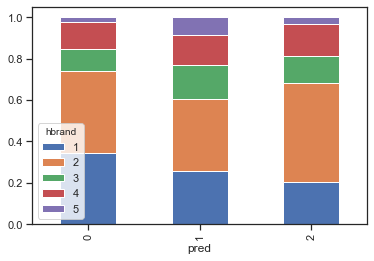

In [311]:
brand_byclust = df_data.groupby('pred').hbrand.value_counts(normalize=True)
print (brand_byclust.to_frame())
brand_byclust.unstack().plot(kind='bar', stacked=True)

# C2 is heavily APPLE

# what does the dist of Empowered_Customer_Groups look like for the clusters?

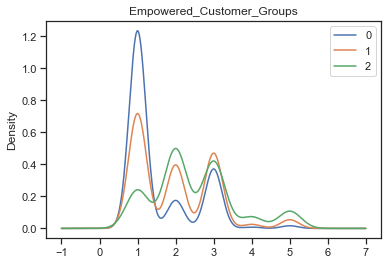

In [312]:
col = 'Empowered_Customer_Groups'
df_data.groupby('pred')[col].plot(kind='kde', title=col, legend=True)[0]

# what does the dist of Empowered_Customer_Groups look like for the brands?

hbrand
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Empowered_Customer_Groups, dtype: object

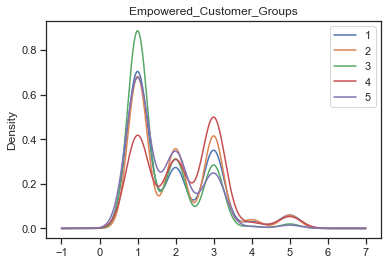

In [313]:
col = 'Empowered_Customer_Groups'
df_data.groupby('hbrand')[col].plot(kind='kde', title=col, legend=True)

                                    hbrand
Empowered_Customer_Groups hbrand          
1                         2       0.368037
                          1       0.295756
                          3       0.175729
                          4       0.098806
                          5       0.061671
2                         2       0.408708
                          1       0.241573
                          4       0.153090
                          3       0.130618
                          5       0.066011
3                         2       0.394399
                          1       0.259043
                          4       0.207701
                          3       0.099183
                          5       0.039673
4                         2       0.500000
                          1       0.296875
                          4       0.140625
                          3       0.046875
                          5       0.015625
5                         2       0.424779
           

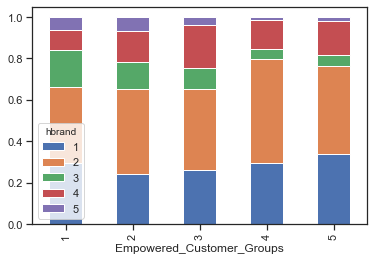

In [314]:
brand_byecg = df_data.groupby(col).hbrand.value_counts(normalize=True)
print (brand_byecg.to_frame())
brand_byecg.unstack().plot(kind='bar', stacked=True)

# How do UX_loyalty and UXIndex vary by cluster?

       count      mean       std       min       25%  50%       75%  max
pred                                                                    
0     1084.0  6.639145  0.518001  3.666667  6.333333  7.0  7.000000  7.0
1     1501.0  5.794581  0.811969  1.000000  5.166667  6.0  6.333333  7.0
2      669.0  4.840309  1.112681  1.000000  4.000000  5.0  5.666667  7.0


pred
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: UX_Loyalty, dtype: object

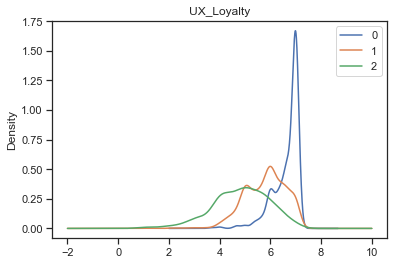

In [317]:
col = 'UX_Loyalty'
print(df_data.groupby('pred')[col].describe())
df_data.groupby('pred')[col].plot(kind='kde', title=col, legend=True)

       count       mean        std       min        25%        50%        75%    max
pred                                                                                
0     1084.0  87.124506  15.560443  0.000000  77.740700  91.754658  100.00000  100.0
1     1501.0  65.763586  19.605409  0.000000  53.421500  66.761406   77.74070  100.0
2      669.0  44.336672  20.076823  0.103148  29.388703  43.613690   57.32817  100.0


pred
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: UXindex, dtype: object

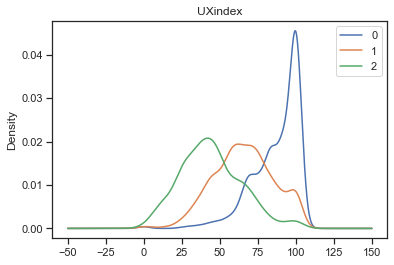

In [318]:
col = 'UXindex'
print(df_data.groupby('pred')[col].describe())
df_data.groupby('pred')[col].plot(kind='kde', title=col, legend=True)

# Determined Variable importance in Cluster 2
https://www.researchgate.net/post/How_can_I_identify_the_variables_that_contribute_most_to_creating_the_partition_between_two_clusters_with_a_logistical_model

In [324]:
df_data_sub_std['pred'].describe()

count    3254.000000
mean        0.872465
std         0.722922
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: pred, dtype: float64

In [325]:
df_data_sub_std['pred_2'] = np.where(df_data_sub_std['pred']==2, 1, 0)

In [323]:
df_data_sub_std['pred']

0       1
1       1
2       1
3       1
4       0
       ..
3249    1
3250    1
3251    0
3252    1
3253    1
Name: pred, Length: 3254, dtype: int32

In [347]:
df_data_sub_std_vars=df_data_sub_std.columns.values.tolist()
y = df_data_sub_std['pred_2']
X = df_data_sub_std
X = X.drop(columns=['pred','pred_2'])
X.columns

Index(['qxtime', 'qxoverallxqualityxindicators_1', 'qxoverallxqualityxindicators_2', 'qxoverallxqualityxindicators_3', 'qxoverallxqualityxindicators_4', 'qxactivitiesximportance_1', 'qxactivitiesximportance_2', 'qxactivitiesximportance_3', 'qxactivitiesximportance_4', 'qxactivitiesximportance_5',
       ...
       'qxactivitiesxdrivers_28_25', 'qxactivitiesxdrivers_29_25', 'qxactivitiesxdrivers_30_25', 'qxactivitiesxdrivers_31_25', 'qxactivitiesxdrivers_32_25', 'qxactivitiesxdrivers_33_25', 'qxactivitiesxdrivers_34_25', 'qxunlocking', 'qxtransition_1', 'qxexpectations'], dtype='object', length=1076)

In [348]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [349]:
m = LogisticRegression()
m.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

array([-0.11702296,  0.02195603, -0.18512348, ...,  0.03746361,
        0.02151166, -0.05536605])

In [394]:
# The estimated coefficients will all be around 1:
coefs = pd.DataFrame(list(zip(X.columns, m.coef_[0])))
coefs.columns = ['Variable', 'coefficient']
coefs = coefs.sort_values(['coefficient'], ascending=False)
coefs = coefs.merge(df_varmap[['Variable', 'Label']], on='Variable', how='left')
coefs.head(20)

Variable  coefficient                                                                                                                                                                                                                                                             Label
0   qxactivitiesxqualityxindicators_2_10     0.466901  Q_Activities_Quality_Indicators. Is enjoyable - Setting up and managing notifications - How much do you agree or disagree with the following about different activities you do with [MODEL]? Again, please think of your experience with the preinstalled manufa
1   qxactivitiesxqualityxindicators_1_23     0.386157  Q_Activities_Quality_Indicators. Reinforces my trust in [BRAND] - Making a mobile payment with your smartphone at a store terminal - How much do you agree or disagree with the following about different activities you do with [MODEL]? Again, please think of
2             qxactivitiesxdrivers_25_24     0.336681  Q_Activities_Drivers. Asking digital assistant a question - My [MODEL] introduces me to new experiences and adventures - How much do you agree or disagree with the following statements for the activities below? For each of these activities, please think of
3           qxactivitiesxsatisfaction_21     0.334280                                                                                        Q_Activities_Satisfaction. Tracking your wellbeing (steps, exercise, sleep, etc.) - How satisfied are you with your [MODEL]’s performance on each of the activities below?
4             qxactivitiesxdrivers_19_17     0.289788   Q_Activities_Drivers. Recording a video - My [MODEL] has innovative capabilities and design that allow me to stand out from the crowd - How much do you agree or disagree with the following statements for the activities below? For each of these activities,
5           qxactivitiesxsatisfaction_17     0.281992                                                                                                                             Q_Activities_Satisfaction. Recording a video - How satisfied are you with your [MODEL]’s performance on each of the activities below?
6   qxactivitiesxqualityxindicators_1_14     0.280316  Q_Activities_Quality_Indicators. Reinforces my trust in [BRAND] - Sending and receiving a text message - How much do you agree or disagree with the following about different activities you do with [MODEL]? Again, please think of your experience with the pr
7                           qxdrivers_11     0.270242                                                                                                 Q_Drivers. Design and capabilities of my [MODEL] make me feel like my unique identity is respected - How much do you agree or disagree with the statements below?
8    qxactivitiesxqualityxindicators_4_1     0.268249  Q_Activities_Quality_Indicators. Is simple and easy - Using speaker phone (including all aspects of it, such as dialing, quality of sound, etc.) - How much do you agree or disagree with the following about different activities you do with [MODEL]? Again, p
9           qxactivitiesxsatisfaction_13     0.268158                                                                                                    Q_Activities_Satisfaction. Setting an alarm (e.g., single, recurring) - How satisfied are you with your [MODEL]’s performance on each of the activities below?
10  qxactivitiesxqualityxindicators_3_23     0.262038  Q_Activities_Quality_Indicators. Meets my needs / provides the desirable result - Making a mobile payment with your smartphone at a store terminal - How much do you agree or disagree with the following about different activities you do with [MODEL]? Again,
11            qxactivitiesxdrivers_18_18     0.255921   Q_Activities_Drivers. Editing a photo (in the gallery) - My [MODEL] adds the elements of surprise and delight to my life - How much do you agree or disagree with the following statements for the activities below? For each of these a

In [418]:
# desc_df = df_data_sub_std.groupby('pred').describe()
# desc_df = desc_df.unstack().reset_index(['Variable','Metric'])
# desc_df.columns = ['Variable','Metric','pred','value']
desc_df.head()

qxtime                                                                       qxoverallxqualityxindicators_1                                                                       qxoverallxqualityxindicators_2                                                                       qxoverallxqualityxindicators_3                                                                       qxoverallxqualityxindicators_4                                                                       qxactivitiesximportance_1                                                                       qxactivitiesximportance_2                                                                       qxactivitiesximportance_3                                                                       qxactivitiesximportance_4                                                                       qxactivitiesximportance_5                                                                       qxactivitiesximportance_6  \
       count      mean       std       min       25%       50%       75%       max                          count      mean       std       min       25%       50%       75%       max                          count      mean       std       min       25%       50%       75%       max                          count      mean       std       min       25%       50%       75%       max                          count      mean       std       min       25%       50%       75%       max                     count      mean       std       min       25%       50%       75%       max                     count      mean       std       min       25%       50%       75%       max                     count      mean       std       min       25%       50%       75%       max                     count      mean       std       min       25%       50%       75%       max                     count      mean       std       min       25%       50%       75%       max                     count   
pred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
0     1084.0 -0.119913  1.000908 -2.161439 -0.760797 -0.060476  0.639844  2.040486                         1084.0  0.598553  0.671644 -3.737796  0.201696  0.989595  0.989595  0.989595                         1084.0  0.629196  0.678837 -3.914081  0.183866  1.003455  1.003455  1.003455                         1084.0  0.565589  0.651071 -4.064226  0.078682  0.907264  0.907264  0.907264                         1084.0  0.512144  0.659249 -4.651722 -0.086699  0.826306  0.826306  0.826306                    1084.0  0.382794  0.852571 -3.072927 -0.354986  1.003984  1.003984  1.003984                    1084.0  0.317614  0.752045 -4.748074 -0.227819  0.676232  0.676232  0.676232                    1084.0  0.318533  0.986991 -2.408186 -0.018725  0.578640  1.176005  1.176005                    1084.0  0.294555  0.895734 -3.292562  0.174302  0.867675  0.867675  0.867675                    1084.0  0.421100  0.789432 -3.609582  0.149244  0.901009  0.901009  0.901009                    1084.0   
1     1501.0  0.066431